# 3. ÌöåÍ∑ÄÎ∂ÑÏÑù

In [2]:
# ÎùºÏù¥Î∏åÎü¨Î¶¨ import
from datetime import datetime
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
pd.options.display.float_format = lambda x: f'{x:.10f}'
pd.set_option('display.max_rows', 5000)

import matplotlib.pyplot as plt
plt.rc("font", family = "Malgun Gothic")
plt.rc("axes", unicode_minus = False)
import matplotlib as mpl
import seaborn as sns

from geoband.API import *
import re
import geopandas as gpd
import json
import geojson
import folium
from folium.plugins import MarkerCluster
import requests 
from urllib.parse import urlparse
import warnings
warnings.filterwarnings('ignore')

/opt/app-root/lib/python3.6/site-packages/geopandas/_compat.py:110: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


## 3.1. ÌïôÏäµÎç∞Ïù¥ÌÑ∞ Î∞è ÎèÖÎ¶ΩÎ≥ÄÏàò, Ï¢ÖÏÜçÎ≥ÄÏàò ÏÑ†Ï†ï

### (1) ÌïôÏäµÎç∞Ïù¥ÌÑ∞ ÏÑ†Ï†ï

In [3]:
# ÌöåÍ∑ÄÎ∂ÑÏÑùÏóê Ïù¥Ïö©Ìï† ÏµúÏ¢ÖÎç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
Í≤©ÏûêÎ≥Ñ_ÏµúÏ¢ÖÎç∞Ïù¥ÌÑ∞=pd.read_csv('ÏµúÏ¢ÖÎç∞Ïù¥ÌÑ∞/Í≤©ÏûêÎ≥Ñ_ÏµúÏ¢ÖÎç∞Ïù¥ÌÑ∞-Copy1.ver4', encoding='utf-8').drop('Unnamed: 0', axis=1)
Í≤©ÏûêÎ≥Ñ_ÏµúÏ¢ÖÎç∞Ïù¥ÌÑ∞.fillna(0, inplace=True)
Í≤©ÏûêÎ≥Ñ_ÏµúÏ¢ÖÎç∞Ïù¥ÌÑ∞ = Í≤©ÏûêÎ≥Ñ_ÏµúÏ¢ÖÎç∞Ïù¥ÌÑ∞.replace([np.inf, -np.inf], 0)
Í≤©ÏûêÎ≥Ñ_ÏµúÏ¢ÖÎç∞Ïù¥ÌÑ∞.columns

Index(['Unnamed: 0.1', 'id', 'geometry', 'coordinates', 'geo_cent', 'grid_id',
       'ÌñâÏ†ïÎèô', 'Í∞ÄÍµ¨Ïàò', 'Ï†ïÍ∑úÌôî_Í∞ÄÍµ¨Ïàò', 'Î∞±Î∂ÑÏú®Í∞ÄÍµ¨Ïàò', 'Ïù∏Íµ¨Ïàò', 'Ïö¥Ï†ÑÍ∞ÄÎä•Ïù∏Íµ¨', 'ÏûêÎèôÏ∞®Îì±Î°ùÏàò', 'Ï£ºÏ∞®Í∞ÄÎä•Ï∞®ÎüâÏàò',
       'Ï£ºÏ∞®Î©¥Ïàò', 'Ï†ïÍ∑úÌôî_Ï£ºÏ∞®Î©¥Ïàò', 'Ï£ºÏ∞®Ïû•ÌôïÎ≥¥Ïú®', 'Î∂àÎ≤ïÏ£ºÏ†ïÏ∞®', 'Ï†ïÍ∑úÌôî_Î∂àÎ≤ïÏ£ºÏ†ïÏ∞®', 'Î≤ÑÏä§', 'ÏßÄÌïòÏ≤†',
       'Ï†ïÍ∑úÌôî_Î≤ÑÏä§', 'Ï†ïÍ∑úÌôî_ÏßÄÌïòÏ≤†', 'Ï£ºÍ±∞ÏãúÏÑ§', 'Ï†ïÍ∑úÌôî_Ï£ºÍ±∞ÏãúÏÑ§'],
      dtype='object')

In [4]:
Í≤©ÏûêÎ≥Ñ_ÏµúÏ¢ÖÎç∞Ïù¥ÌÑ∞['Ï£ºÏ∞®Ïû•ÌôïÎ≥¥Ïú®'].describe() # Ï£ºÏ∞®Ïû•ÌôïÎ≥¥Ïú®Ïù¥ 30,000 ÎÑòÏñ¥Í∞ÄÎäî outlier Ï°¥Ïû¨

count     543.0000000000
mean       64.3616304934
std      1345.7362524120
min         0.0000000000
25%         0.0000000000
50%         0.0000000000
75%         1.0236323978
max     31354.7677616314
Name: Ï£ºÏ∞®Ïû•ÌôïÎ≥¥Ïú®, dtype: float64

In [5]:
# ÌïôÏäµÎç∞Ïù¥ÌÑ∞ ÌïÑÌÑ∞ÎßÅ
ÌöåÍ∑ÄÎ™®Îç∏ = Í≤©ÏûêÎ≥Ñ_ÏµúÏ¢ÖÎç∞Ïù¥ÌÑ∞[(Í≤©ÏûêÎ≥Ñ_ÏµúÏ¢ÖÎç∞Ïù¥ÌÑ∞['Ï£ºÏ∞®Ïû•ÌôïÎ≥¥Ïú®']>0.8)&(Í≤©ÏûêÎ≥Ñ_ÏµúÏ¢ÖÎç∞Ïù¥ÌÑ∞['Ï£ºÏ∞®Ïû•ÌôïÎ≥¥Ïú®']<10)&(Í≤©ÏûêÎ≥Ñ_ÏµúÏ¢ÖÎç∞Ïù¥ÌÑ∞['Í∞ÄÍµ¨Ïàò']!=0)]

### (2) ÎèÖÎ¶ΩÎ≥ÄÏàò, Ï¢ÖÏÜçÎ≥ÄÏàò ÏÑ†Ï†ï
#### [1] ÏÇ∞Ï†êÎèÑ Î∞è ÌöåÍ∑ÄÏÑ†

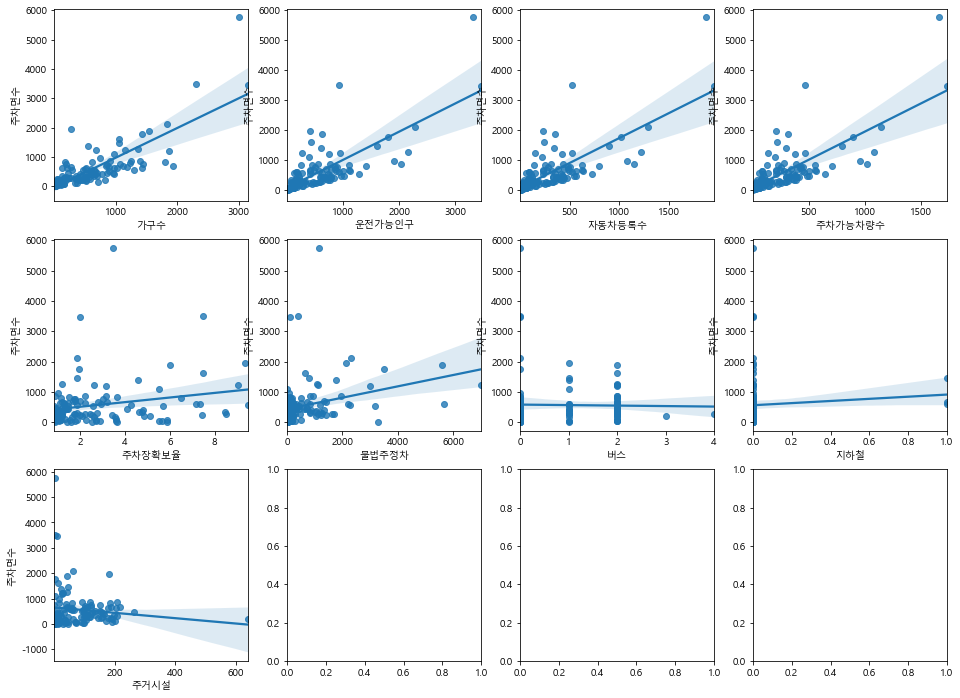

In [6]:
fig, axs = plt.subplots(figsize=(16,12), nrows=3, ncols=4)
x_features = ["Í∞ÄÍµ¨Ïàò","Ïö¥Ï†ÑÍ∞ÄÎä•Ïù∏Íµ¨","ÏûêÎèôÏ∞®Îì±Î°ùÏàò","Ï£ºÏ∞®Í∞ÄÎä•Ï∞®ÎüâÏàò","Ï£ºÏ∞®Ïû•ÌôïÎ≥¥Ïú®","Î∂àÎ≤ïÏ£ºÏ†ïÏ∞®","Î≤ÑÏä§","ÏßÄÌïòÏ≤†","Ï£ºÍ±∞ÏãúÏÑ§"]
for i, feature in enumerate(x_features):    
    #ÌòÑÏû¨ subplotÏùò Ìñâ, Ïó¥ Î≤àÌò∏ Í∞±Ïã†
    row = int(i/4) #columnÏù¥ 4Í∞úÏù¥ÎØÄÎ°ú
    col = i%4
    #ÏÇ∞Ï†êÎèÑÏôÄ ÌöåÍ∑ÄÏÑ† ÏãúÍ∞ÅÌôî
    sns.regplot(x=feature, y='Ï£ºÏ∞®Î©¥Ïàò', data=ÌöåÍ∑ÄÎ™®Îç∏, ax=axs[row][col])

#### [2] Ïª¨ÎüºÎ≥Ñ ÎèÖÎ¶ΩÎ≥ÄÏàò Í∞ÑÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÏãúÍ∞ÅÌôî(Îã§Ï§ëÍ≥µÏÑ†ÏÑ±Ïù¥ ÏùòÏã¨ÎêòÎäî ÎèÖÎ¶ΩÎ≥ÄÏàòÎì§)

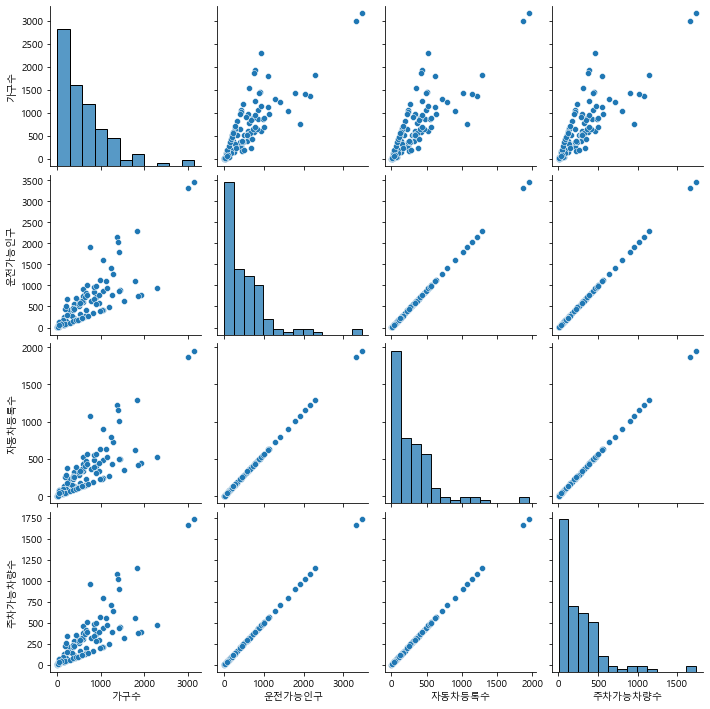

In [7]:
# Ï†ÑÏ≤¥ Ïª¨ÎüºÏóêÏÑú ÏÉÅÌò∏Í∞ÑÏùò Í¥ÄÍ≥ÑÎ•º ÌååÏïÖÌï† Î≥ÄÏàòÎì§
ccol = ['Í∞ÄÍµ¨Ïàò','Ïö¥Ï†ÑÍ∞ÄÎä•Ïù∏Íµ¨', 'ÏûêÎèôÏ∞®Îì±Î°ùÏàò', 'Ï£ºÏ∞®Í∞ÄÎä•Ï∞®ÎüâÏàò']

#pairplot ÏãúÍ∞ÅÌôî
sns.pairplot(ÌöåÍ∑ÄÎ™®Îç∏[ccol])

<AxesSubplot:>

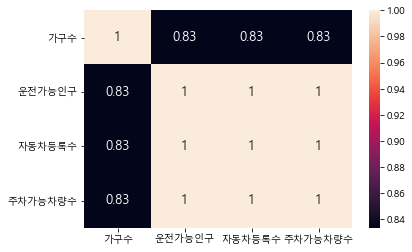

In [8]:
# Î≥ÄÏàò Í∞ÑÏùò ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞
corrs = ÌöåÍ∑ÄÎ™®Îç∏[ccol].corr()

# ÏÉÅÍ¥ÄÍ≥ÑÏàò Í∞íÏóê ÎåÄÌïú ÌûàÌä∏Îßµ
# Îß§Í∞úÎ≥ÄÏàò annot: ÎßµÏóê Í∞í ÌëúÏãú Ïó¨Î∂Ä ÏßÄÏ†ï
# Îß§Í∞úÎ≥ÄÏàò annot_kws: ÌëúÏãúÎêòÎäî Í∞íÏóê ÎåÄÌïú Ï∂îÍ∞Ä ÏòµÏÖò
sns.heatmap(corrs, annot=True, annot_kws={'size':13})

#### [3] ÎèÖÎ¶ΩÎ≥ÄÏàò, Ï¢ÖÏÜçÎ≥ÄÏàò ÏÑ†Ï†ï

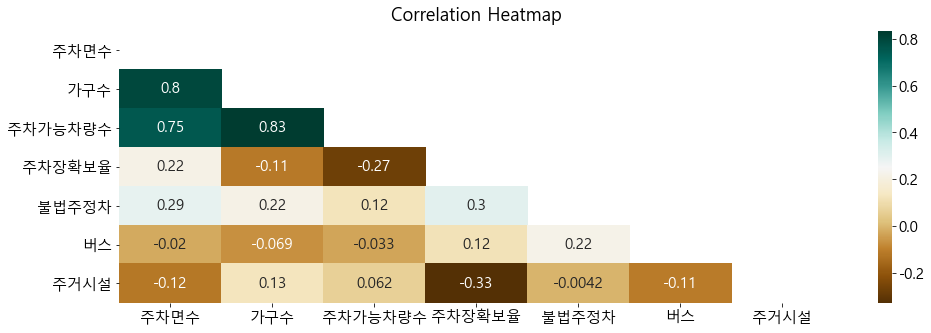

In [9]:
# Îã§Ï§ëÍ≥µÏÇ∞ÏÑ±ÏúºÎ°ú Î≥¥Ïù¥Îäî "Ïö¥Ï†ÑÍ∞ÄÎä•Ïù∏Íµ¨", ÏûêÎèôÏ∞®Îì±Î°ùÏàò" Ï†úÍ±∞
# 6Í∞úÏùò ÌñâÏóêÎßå Ï°¥Ïû¨ÌïòÎäî "ÏßÄÌïòÏ≤†" Ï†úÍ±∞

X = ÌöåÍ∑ÄÎ™®Îç∏[["Í∞ÄÍµ¨Ïàò","Ï£ºÏ∞®Í∞ÄÎä•Ï∞®ÎüâÏàò","Ï£ºÏ∞®Ïû•ÌôïÎ≥¥Ïú®","Î∂àÎ≤ïÏ£ºÏ†ïÏ∞®","Î≤ÑÏä§","Ï£ºÍ±∞ÏãúÏÑ§"]] # ÎèÖÎ¶ΩÎ≥ÄÏàò
y = ÌöåÍ∑ÄÎ™®Îç∏["Ï£ºÏ∞®Î©¥Ïàò"] # Ï¢ÖÏÜçÎ≥ÄÏàò

# ÎèÖÎ¶ΩÎ≥ÄÏàò, Ï¢ÖÏÜçÎ≥ÄÏàò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌûàÌä∏Îßµ
mask = np.triu(np.ones_like(pd.concat([y,X], axis=1).corr(), dtype=np.bool))
plt.rcParams['font.size'] = 15

fig, ax = plt.subplots(figsize=(16, 5))
sns.heatmap(pd.concat([y,X], axis=1).corr(), 
            annot=True, 
            cmap="BrBG", 
            mask = mask)
ax.set_title('Correlation Heatmap', pad = 10)
plt.show()

* ÎèÖÎ¶ΩÎ≥ÄÏàò, Ï¢ÖÏÜçÎ≥ÄÏàòÎßå Ìè¨Ìï®Ìïú ÏµúÏ¢Ö ÌïôÏäµÎç∞Ïù¥ÌÑ∞ ÏÑ†Ï†ï

In [10]:
ÏµúÏ¢ÖÎç∞Ïù¥ÌÑ∞_ÏàòÏπòÎßå = pd.concat([y,X], axis=1)
ÏµúÏ¢ÖÎç∞Ïù¥ÌÑ∞_ÏàòÏπòÎßå

Ï£ºÏ∞®Î©¥Ïàò             Í∞ÄÍµ¨Ïàò         Ï£ºÏ∞®Í∞ÄÎä•Ï∞®ÎüâÏàò       Ï£ºÏ∞®Ïû•ÌôïÎ≥¥Ïú®  \
11  1957.0000000000  275.0000000000  209.3562920044 9.3477009039   
12   652.0000000000  268.0000000000  204.0272227534 3.1956519880   
14   583.0000000000  606.0000000000  461.3451380170 1.2636959880   
15  1471.0000000000 1051.0000000000  800.1216832605 1.8384703612   
17   268.0000000000  155.0000000000  122.4325114099 2.1889610604   
18    40.0000000000   14.0000000000   11.0584203854 3.6171531381   
19    65.0000000000   14.0000000000   11.0584203854 5.8778738495   
20    30.0000000000   58.0000000000   28.8312952726 1.0405359772   
30  2108.0000000000 1830.0000000000 1148.2611869793 1.8358192578   
31   576.0000000000  499.0000000000  313.1050996190 1.8396378746   
32  1268.0000000000 1368.0000000000 1080.5656490886 1.1734594757   
35    64.0000000000  116.0000000000   57.6625905452 1.1099050423   
36   217.0000000000  513.0000000000  255.0078357731 0.8509542436   
48   456.0000000000  694.0000000000  504.8599816366 0.9032207277   
50   253.0000000000  390.0000000000  283.7109406892 0.8917527092   
52   406.0000000000  624.0000000000  391.5382408061 1.0369357516   
55     7.0000000000   16.0000000000    7.9534607649 0.8801200140   
74   294.0000000000  500.0000000000  313.7325647484 0.9371038682   
78    20.0000000000   11.0000000000    5.4680042758 3.6576416168   
79    58.0000000000   75.0000000000   37.2818473353 1.5557169010   
94   868.0000000000 1404.0000000000 1021.3593864810 0.8498477730   
96   627.0000000000  513.0000000000  282.1462069089 2.2222520971   
102  670.0000000000 1118.0000000000  555.7480709442 1.2055822324   
107   13.0000000000    9.0000000000    5.1760986383 2.5115441007   
119   58.0000000000   75.0000000000   54.5597962864 1.0630538226   
122   79.0000000000  157.0000000000   86.3488391514 0.9148935964   
123 3464.0000000000 3157.0000000000 1736.3266573320 1.9950163095   
128  537.0000000000 1292.0000000000  642.2419567620 0.8361334764   
129  428.0000000000  602.0000000000  299.2489612776 1.4302472369   
131  330.0000000000  124.0000000000   71.3151367949 4.6273486223   
147   51.0000000000  106.0000000000   58.2992162424 0.8747973521   
148  263.0000000000  271.0000000000  149.0479962423 1.7645322757   
153  709.0000000000  857.0000000000  426.0072422175 1.6642909550   
154   62.0000000000  109.0000000000   54.1829514606 1.1442713682   
156  441.0000000000  232.0000000000  335.3409463198 1.3150794880   
157  625.0000000000  980.0000000000  563.6196295084 1.1089038906   
160  795.0000000000 1233.0000000000  709.1255134529 1.1210991354   
169  343.0000000000  355.0000000000   71.8706373014 4.7724635940   
176 1381.0000000000  547.0000000000  300.8459555149 4.5903891167   
177  284.0000000000  380.0000000000  117.1175128742 2.4249148828   
178  502.0000000000  596.0000000000  377.1022418481 1.3312039662   
179   64.0000000000   92.0000000000   58.2104131712 1.0994596416   
187  241.0000000000  358.0000000000  205.8937013918 1.1705069090   
195  813.0000000000  617.0000000000  124.9131921548 6.5085199247   
196 1607.0000000000 1060.0000000000  214.5996494069 7.4883626532   
200  114.0000000000  335.0000000000  136.3409104897 0.8361393480   
201  405.0000000000  783.0000000000  318.6714415326 1.2709014590   
202  527.0000000000  891.0000000000  362.6261231233 1.4532874672   
203  684.0000000000  846.0000000000  344.3116724605 1.9865722097   
204  426.0000000000  967.0000000000  298.0332498668 1.4293707168   
205  294.0000000000  517.0000000000  159.3414583052 1.8450941966   
206  241.0000000000  377.0000000000  238.5361496254 1.0103290440   
209  407.0000000000  658.0000000000  416.3309985504 0.9775875479   
210   36.0000000000   14.0000000000   20.2360915883 1.7789996573   
213  228.0000000000   52.0000000000   66.4100218841 3.4332167575   
223  539.0000000000  467.0000000000   94.5453172387 5.7009698179   
224  405.0000000000  415.0000000000   84.0177872678 4.8204078347   
228  764.0000000000 1063.000000

## 3.2. ÌöåÍ∑ÄÎ™®Îç∏ ÏÑ†Ï†ï
### (1) ÌöåÍ∑ÄÎ™®Îç∏ ÏÑ±Îä• ÌèâÍ∞ÄÏßÄÌëú : Í≤∞Ï†ïÍ≥ÑÏàò($R^2$)
* Ïã§Ï†úÍ∞íÏùò Î∂ÑÏÇ∞ ÎåÄÎπÑ ÏòàÏ∏°Í∞íÏùò Î∂ÑÏÇ∞ ÎπÑÏú®
* Í≤∞Ï†ï Í≥ÑÏàòÏùò Í∞íÏùÄ 0 ‚â§ R2 ‚â§ 1Ïù¥Î©∞ 1Ïóê Í∞ÄÍπåÏö∏ÏàòÎ°ù ÏÑ§Î™ÖÎ†•Ïù¥ Í∞ïÌïòÍ≥†, 0Ïóê Í∞ÄÍπåÏö∏ÏàòÎ°ù ÏÑ§Î™ÖÎ†•Ïù¥ ÏïΩÌïòÎã§.

In [11]:
# ÌöåÍ∑ÄÎ™®Îç∏ import
from sklearn import model_selection
from sklearn import metrics

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Perceptron

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [12]:
X

Í∞ÄÍµ¨Ïàò         Ï£ºÏ∞®Í∞ÄÎä•Ï∞®ÎüâÏàò       Ï£ºÏ∞®Ïû•ÌôïÎ≥¥Ïú®           Î∂àÎ≤ïÏ£ºÏ†ïÏ∞®  Î≤ÑÏä§  Ï£ºÍ±∞ÏãúÏÑ§
11   275.0000000000  209.3562920044 9.3477009039 2141.0000000000   1   183
12   268.0000000000  204.0272227534 3.1956519880  707.0000000000   2   189
14   606.0000000000  461.3451380170 1.2636959880  845.0000000000   1    58
15  1051.0000000000  800.1216832605 1.8384703612  785.0000000000   1    47
17   155.0000000000  122.4325114099 2.1889610604  115.0000000000   2    48
18    14.0000000000   11.0584203854 3.6171531381  174.0000000000   0     6
19    14.0000000000   11.0584203854 5.8778738495   18.0000000000   0    15
20    58.0000000000   28.8312952726 1.0405359772   43.0000000000   2    73
30  1830.0000000000 1148.2611869793 1.8358192578 2293.0000000000   0    62
31   499.0000000000  313.1050996190 1.8396378746 1186.0000000000   1    53
32  1368.0000000000 1080.5656490886 1.1734594757 1075.0000000000   2    44
35   116.0000000000   57.6625905452 1.1099050423    5.0000000000   0   190
36   513.0000000000  255.0078357731 0.8509542436  106.0000000000   0   640
48   694.0000000000  504.8599816366 0.9032207277  705.0000000000   0   264
50   390.0000000000  283.7109406892 0.8917527092 1103.0000000000   4   144
52   624.0000000000  391.5382408061 1.0369357516 1319.0000000000   2   109
55    16.0000000000    7.9534607649 0.8801200140   14.0000000000   0    13
74   500.0000000000  313.7325647484 0.9371038682   63.0000000000   0   118
78    11.0000000000    5.4680042758 3.6576416168    5.0000000000   0    31
79    75.0000000000   37.2818473353 1.5557169010   60.0000000000   0     2
94  1404.0000000000 1021.3593864810 0.8498477730 1950.0000000000   2   209
96   513.0000000000  282.1462069089 2.2222520971  218.0000000000   2    45
102 1118.0000000000  555.7480709442 1.2055822324   82.0000000000   0    42
107    9.0000000000    5.1760986383 2.5115441007   25.0000000000   0    46
119   75.0000000000   54.5597962864 1.0630538226   52.0000000000   0    97
122  157.0000000000   86.3488391514 0.9148935964   47.0000000000   2    39
123 3157.0000000000 1736.3266573320 1.9950163095  109.0000000000   0     9
128 1292.0000000000  642.2419567620 0.8361334764  309.0000000000   2    58
129  602.0000000000  299.2489612776 1.4302472369  309.0000000000   2    20
131  124.0000000000   71.3151367949 4.6273486223  814.0000000000   2   103
147  106.0000000000   58.2992162424 0.8747973521    4.0000000000   0   100
148  271.0000000000  149.0479962423 1.7645322757  162.0000000000   1    88
153  857.0000000000  426.0072422175 1.6642909550   69.0000000000   0   102
154  109.0000000000   54.1829514606 1.1442713682   64.0000000000   0    68
156  232.0000000000  335.3409463198 1.3150794880  441.0000000000   0    33
157  980.0000000000  563.6196295084 1.1089038906  211.0000000000   0   103
160 1233.0000000000  709.1255134529 1.1210991354  513.0000000000   2    41
169  355.0000000000   71.8706373014 4.7724635940   14.0000000000   0     5
176  547.0000000000  300.8459555149 4.5903891167 1772.0000000000   1    24
177  380.0000000000  117.1175128742 2.4249148828  449.0000000000   0   159
178  596.0000000000  377.1022418481 1.3312039662   14.0000000000   0    92
179   92.0000000000   58.2104131712 1.0994596416  131.0000000000   2    45
187  358.0000000000  205.8937013918 1.1705069090  205.0000000000   0    15
195  617.0000000000  124.9131921548 6.5085199247  173.0000000000   2    18
196 1060.0000000000  214.5996494069 7.4883626532  643.0000000000   2    13
200  335.0000000000  136.3409104897 0.8361393480  112.0000000000   0   171
201  783.0000000000  318.6714415326 1.2709014590  238.0000000000   0   166
202  891.0000000000  362.6261231233 1.4532874672  424.0000000000   0   152
203  846.0000000000  344.3116724605 1.9865722097 1351.0000000000   2   109
204  967.0000000000  298.0332498668 1.4293707168  625.0000000000   2   124
205  517.0000000000  159.3414583052 1.8450941966 1249.0000000000   0   116
206  377.0000000000  238.5361496254 1.0103290440  214.00000000

In [13]:
y

11    1957.0000000000
12     652.0000000000
14     583.0000000000
15    1471.0000000000
17     268.0000000000
18      40.0000000000
19      65.0000000000
20      30.0000000000
30    2108.0000000000
31     576.0000000000
32    1268.0000000000
35      64.0000000000
36     217.0000000000
48     456.0000000000
50     253.0000000000
52     406.0000000000
55       7.0000000000
74     294.0000000000
78      20.0000000000
79      58.0000000000
94     868.0000000000
96     627.0000000000
102    670.0000000000
107     13.0000000000
119     58.0000000000
122     79.0000000000
123   3464.0000000000
128    537.0000000000
129    428.0000000000
131    330.0000000000
147     51.0000000000
148    263.0000000000
153    709.0000000000
154     62.0000000000
156    441.0000000000
157    625.0000000000
160    795.0000000000
169    343.0000000000
176   1381.0000000000
177    284.0000000000
178    502.0000000000
179     64.0000000000
187    241.0000000000
195    813.0000000000
196   1607.0000000000
200    114

In [14]:
from sklearn import model_selection

# ÌïôÏäµÎç∞Ïù¥ÌÑ∞ ÎÇ¥ train, test set ÏÉùÏÑ±
x_data = X
y_data = y
x_train, x_test, y_train, y_test = model_selection.train_test_split(x_data, y_data, test_size=0.1,random_state=42)

In [15]:
# ÌöåÍ∑ÄÎ™®Îç∏ ÏÑ±Îä• ÌèâÍ∞Ä Ìï®Ïàò
# ÌèâÍ∞ÄÏßÄÌëú = Í≤∞Ï†ïÍ≥ÑÏàò(R2 score)

from sklearn.metrics import r2_score
my_predictions = {}
my_pred = None
my_actual = None
my_name = None

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato']

def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': y_test})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(11, 8))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

def r2_eval(name_, pred, actual):
    global my_predictions, colors, my_pred, my_actual, my_name
    
    my_name = name_
    my_pred = pred
    my_actual = actual
    
    plot_predictions(name_, pred, actual)
    
    r2 = r2_score(actual, pred)

    print('r2 score = {:.3f}'.format(r2))
    my_predictions[name_] = r2
    
    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'r2'])
    print(df)
    min_ = df['r2'].min() - 10
    max_ = df['r2'].max() + 10
    
    length = len(df) / 2
    
    plt.figure(figsize=(9, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=12)
    bars = ax.barh(np.arange(len(df)), df['r2'], height=0.3)
    
    for i, v in enumerate(df['r2']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=12, fontweight='bold', verticalalignment='center')
        
    plt.title('r2 score', fontsize=16)
    plt.xlim(min_, max_)
    
    plt.show()

def add_model(name_, pred, actual):
    global my_predictions, my_pred, my_actual, my_name
    my_name = name_
    my_pred = pred
    my_actual = actual
    
    r2 = r2_score(actual, pred)
    my_predictions[name_] = r2

def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True

def plot_all():
    global my_predictions, my_pred, my_actual, my_name
    
    plot_predictions(my_name, my_pred, my_actual)
    
    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'r2'])
    print(df)
    min_ = df['r2'].min() - 10
    max_ = df['r2'].max() + 10
    
    length = len(df) / 2
    
    plt.figure(figsize=(9, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=12)
    bars = ax.barh(np.arange(len(df)), df['r2'], height=0.3)
    
    for i, v in enumerate(df['r2']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=12, fontweight='bold', verticalalignment='center')
        
    plt.title('r2 score', fontsize=16)
    plt.xlim(min_, max_)
    
    plt.show()

#### 1. Í∑úÏ†úÍ∞Ä ÏóÜÎäî ÏÑ†ÌòïÌöåÍ∑ÄÎ™®Îç∏ (LinearRegression)

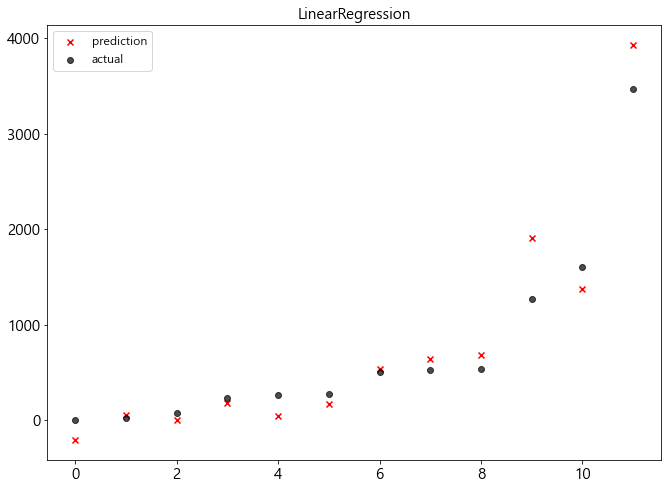

r2 score = 0.922
              model           r2
0  LinearRegression 0.9224053379


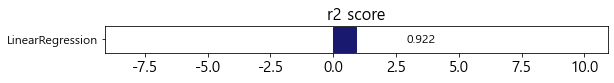

In [16]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(n_jobs=-1)
model.fit(x_train, y_train)
pred = model.predict(x_test)
r2_eval('LinearRegression', pred, y_test)

In [17]:
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)
pred = linear_reg.predict(x_test)
#r2_eval('LinearRegression', pred, y_test)

#### 2. Í∑úÏ†úÍ∞Ä ÏûàÎäî ÏÑ†ÌòïÌöåÍ∑ÄÎ™®Îç∏ ‚ñ∂ Î¶øÏßÄ (Ridge)
* ÌöåÍ∑Ä Î™®Îç∏Ïóê L2Í∑úÏ†ú(Í∞ÄÏ§ëÏπòÏùò Ï†úÍ≥±)Î•º Ï∂îÍ∞Ä
* ùõº = 0 Ïù¥Î©¥ ÏÑ†ÌòïÌöåÍ∑ÄÏôÄ ÎèôÏùºÌïòÎã§.
* ùõºÍ∞Ä Îß§Ïö∞ ÌÅ¨Î©¥ Î™®Îì† Í∞ÄÏ§ëÏπòÍ∞Ä 0 Ïóê Í∞ÄÍπåÏõåÏßÑÎã§ : Í∞ïÌïú Í∑úÏ†ú

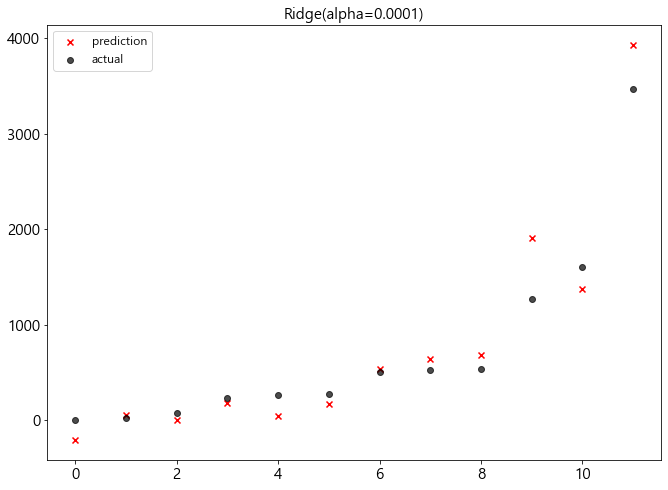

                 model           r2
0     Ridge(alpha=100) 0.9292676297
1      Ridge(alpha=10) 0.9234800922
2       Ridge(alpha=1) 0.9225178884
3     Ridge(alpha=0.1) 0.9224166448
4    Ridge(alpha=0.01) 0.9224064691
5   Ridge(alpha=0.001) 0.9224054511
6  Ridge(alpha=0.0001) 0.9224053492
7     LinearRegression 0.9224053379


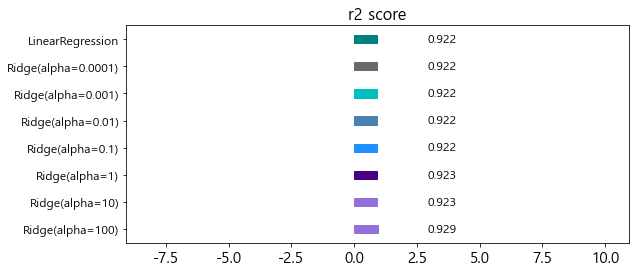

In [18]:
from sklearn.linear_model import Ridge

# Í∞íÏù¥ Ïª§ÏßàÏàòÎ°ù ÌÅ∞ Í∑úÏ†ú
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]

for alpha in alphas:
    ridge = Ridge(alpha=alpha, random_state=42)
    ridge.fit(x_train, y_train)
    pred = ridge.predict(x_test)
    add_model('Ridge(alpha={})'.format(alpha), pred, y_test)
plot_all()

In [19]:
ridge = Ridge(alpha=100) # L2 Í∑úÏ†úÍ≥ÑÏàò alpha=100
ridge.fit(x_train, y_train)
pred = ridge.predict(x_test)
#r2_eval('Ridge(alpha=100)', pred, y_test)

#### 3. Í∑úÏ†úÍ∞Ä ÏûàÎäî ÏÑ†ÌòïÌöåÍ∑ÄÎ™®Îç∏ ‚ñ∂ ÎùºÏèò (Lasso)
* ÌöåÍ∑Ä Î™®Îç∏Ïóê L1Í∑úÏ†ú(Í∞ÄÏ§ëÏπòÏùò Ï†àÎåÄÍ∞íÏóê ÎåÄÌïú Í∑úÏ†ú)Î•º Ï∂îÍ∞Ä

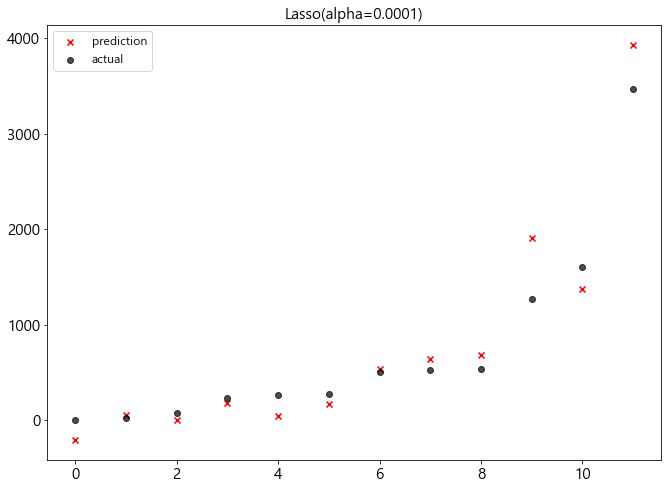

                  model           r2
0      Lasso(alpha=100) 0.9296301631
1      Ridge(alpha=100) 0.9292676297
2       Ridge(alpha=10) 0.9234800922
3       Lasso(alpha=10) 0.9228892912
4        Ridge(alpha=1) 0.9225178884
5        Lasso(alpha=1) 0.9224613302
6      Ridge(alpha=0.1) 0.9224166448
7      Lasso(alpha=0.1) 0.9224110126
8     Ridge(alpha=0.01) 0.9224064691
9     Lasso(alpha=0.01) 0.9224059062
10   Ridge(alpha=0.001) 0.9224054511
11   Lasso(alpha=0.001) 0.9224053948
12  Ridge(alpha=0.0001) 0.9224053492
13  Lasso(alpha=0.0001) 0.9224053436
14     LinearRegression 0.9224053379


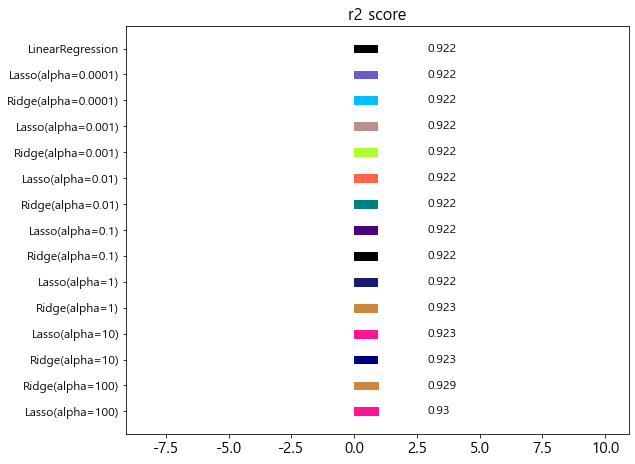

In [20]:
from sklearn.linear_model import Lasso

# Í∞íÏù¥ Ïª§Ïßà ÏàòÎ°ù ÌÅ∞ Í∑úÏ†ú
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(x_train, y_train)
    pred = lasso.predict(x_test)
    add_model('Lasso(alpha={})'.format(alpha), pred, y_test)
plot_all()

In [21]:
lasso = Lasso(alpha=100) # L1 Í∑úÏ†úÍ≥ÑÏàò alpha=100
lasso.fit(x_train, y_train)
pred = lasso.predict(x_test)
#r2_eval('Lasso(alpha=100)', pred, y_test)

#### 4. Í∑úÏ†úÍ∞Ä ÏûàÎäî ÏÑ†ÌòïÌöåÍ∑ÄÎ™®Îç∏ ‚ñ∂ÏóòÎùºÏä§Ìã±ÎÑ∑ (ElasticNet)
* L1 Í∑úÏ†úÏôÄ L2Í∑úÏ†úÎ•º ÌòºÌï©Ìïú ÌöåÍ∑ÄÎ°ú, Îëê Ï¢ÖÎ•òÏùò Í∑úÏ†úÎ•º ÌòºÌï©ÌïòÏó¨ Î¶øÏßÄ ÌöåÍ∑ÄÏôÄ ÎùºÏèò ÌöåÍ∑ÄÏùò Ï†àÏ∂© ÌòïÌÉúÎ•º ÌïôÏäµ Î™®Îç∏Î°ú ÎèÑÏ∂úÌïúÎã§.
* ùõºÎäî Í∑úÏ†ú Îß§Í∞úÎ≥ÄÏàòÏù¥Í≥† ratioÎäî ÌòºÌï© ÎπÑÏú®Ïù¥Îã§.
* ratio=0 : L2 Í∑úÏ†úÏôÄ ÎèôÏùºÌïòÎØÄÎ°ú Î¶øÏßÄ ÌöåÍ∑Ä
* ratio=1 : L1 Í∑úÏ†úÏôÄ ÎèôÏùºÌïòÎØÄÎ°ú ÎùºÏèò ÌöåÍ∑Ä

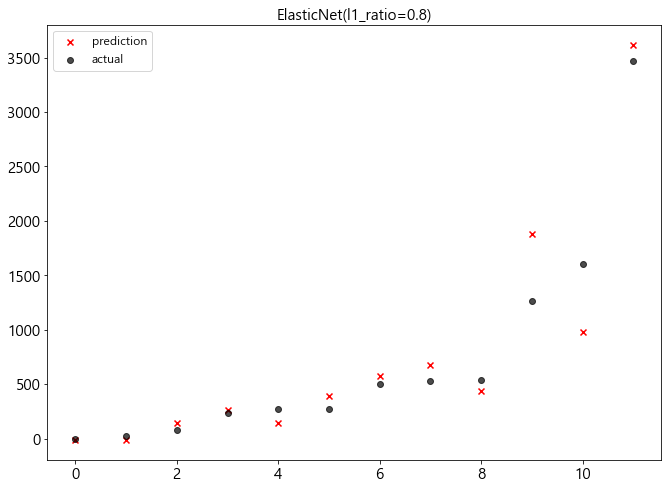

                       model           r2
0           Lasso(alpha=100) 0.9296301631
1           Ridge(alpha=100) 0.9292676297
2            Ridge(alpha=10) 0.9234800922
3            Lasso(alpha=10) 0.9228892912
4             Ridge(alpha=1) 0.9225178884
5             Lasso(alpha=1) 0.9224613302
6           Ridge(alpha=0.1) 0.9224166448
7           Lasso(alpha=0.1) 0.9224110126
8          Ridge(alpha=0.01) 0.9224064691
9          Lasso(alpha=0.01) 0.9224059062
10        Ridge(alpha=0.001) 0.9224054511
11        Lasso(alpha=0.001) 0.9224053948
12       Ridge(alpha=0.0001) 0.9224053492
13       Lasso(alpha=0.0001) 0.9224053436
14          LinearRegression 0.9224053379
15  ElasticNet(l1_ratio=0.8) 0.9201655048
16  ElasticNet(l1_ratio=0.5) 0.9168135059
17  ElasticNet(l1_ratio=0.2) 0.9157586318


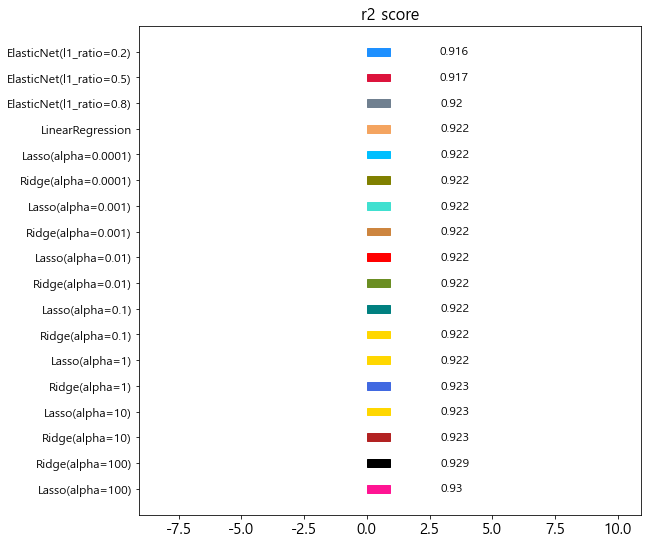

In [22]:
from sklearn.linear_model import ElasticNet

alpha=100
ratios = [0.2, 0.5, 0.8]

for ratio in ratios:
    elasticnet = ElasticNet(alpha=alpha, l1_ratio=ratio, random_state=42)
    elasticnet.fit(x_train, y_train)
    pred = elasticnet.predict(x_test)
    add_model('ElasticNet(l1_ratio={})'.format(ratio), pred, y_test)
plot_all()

In [23]:
elasticnet = ElasticNet(alpha=100, l1_ratio=0.8)
elasticnet.fit(x_train, y_train)
pred = elasticnet.predict(x_test)
#r2_eval('ElasticNet(alpha=100, l1_ratio=0.8)', pred, y_test) 

#### 5. Î≥¥ÌåÖ (Voting) ÏïôÏÉÅÎ∏î
* ÏïôÏÉÅÎ∏î(Ensemble) : Ïó¨Îü¨ Í∞úÏùò ÏïΩÌïú Î∂ÑÎ•òÍ∏∞(Weak Learner)Î•º ÏÉùÏÑ±ÌïòÍ≥†, Í∑∏ ÏòàÏ∏°ÏùÑ Í≤∞Ìï©Ìï®ÏúºÎ°úÏç® Î≥¥Îã§ Ï†ïÌôïÌïú ÏµúÏ¢Ö ÏòàÏ∏°ÏùÑ ÎèÑÏ∂ú
* ÏïôÏÉÅÎ∏î Í∏∞Î≤ïÏùò Ï¢ÖÎ•ò \
1) Î≥¥ÌåÖ (Voting): ÏÑúÎ°ú Îã§Î•∏ ML ÏïåÍ≥†Î¶¨Ï¶òÏúºÎ°ú Ïó¨Îü¨ Í∞úÏùò Î∂ÑÎ•òÍ∏∞Î•º ÏÉùÏÑ±ÌïòÍ≥†, Ìà¨Ìëú(Vote)Î•º ÌÜµÌï¥ ÏµúÏ¢Ö ÏòàÏ∏° Í≤∞Í≥ºÎ•º Í≤∞Ï†ïÌïòÎäî Î∞©Ïãù \
2) Î∞∞ÍπÖ (Bagging): ÏÑúÎ°ú Îã§Î•∏ Îç∞Ïù¥ÌÑ∞ÏúºÎ°ú Ïó¨Îü¨ Í∞úÏùò Î∂ÑÎ•òÍ∏∞Î•º ÏÉùÏÑ±ÌïòÍ≥†, Ìà¨Ìëú(Vote)Î•º ÌÜµÌï¥ ÏµúÏ¢Ö ÏòàÏ∏° Í≤∞Í≥ºÎ•º Í≤∞Ï†ïÌïòÎäî Î∞©Ïãù \
3) Î∂ÄÏä§ÌåÖ (Boosting): Ïù¥Ï†Ñ Ìä∏Î¶¨Ïùò Ïò§Ï∞®Î•º Î≥¥ÏôÑÌïòÎäî Î∞©ÏãùÏúºÎ°ú ÏàúÏ∞®Ï†ÅÏúºÎ°ú Ìä∏Î¶¨Î•º Í∞úÏÑ†ÏãúÌÇ§Îäî Î∞©Ïãù

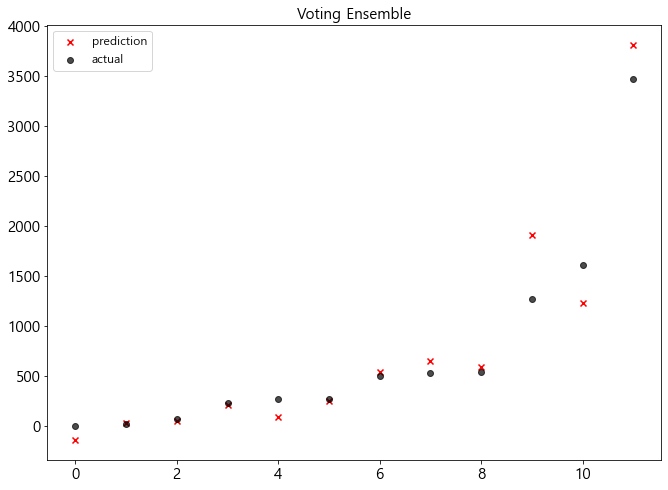

r2 score = 0.931
                       model           r2
0            Voting Ensemble 0.9312117513
1           Lasso(alpha=100) 0.9296301631
2           Ridge(alpha=100) 0.9292676297
3            Ridge(alpha=10) 0.9234800922
4            Lasso(alpha=10) 0.9228892912
5             Ridge(alpha=1) 0.9225178884
6             Lasso(alpha=1) 0.9224613302
7           Ridge(alpha=0.1) 0.9224166448
8           Lasso(alpha=0.1) 0.9224110126
9          Ridge(alpha=0.01) 0.9224064691
10         Lasso(alpha=0.01) 0.9224059062
11        Ridge(alpha=0.001) 0.9224054511
12        Lasso(alpha=0.001) 0.9224053948
13       Ridge(alpha=0.0001) 0.9224053492
14       Lasso(alpha=0.0001) 0.9224053436
15          LinearRegression 0.9224053379
16  ElasticNet(l1_ratio=0.8) 0.9201655048
17  ElasticNet(l1_ratio=0.5) 0.9168135059
18  ElasticNet(l1_ratio=0.2) 0.9157586318


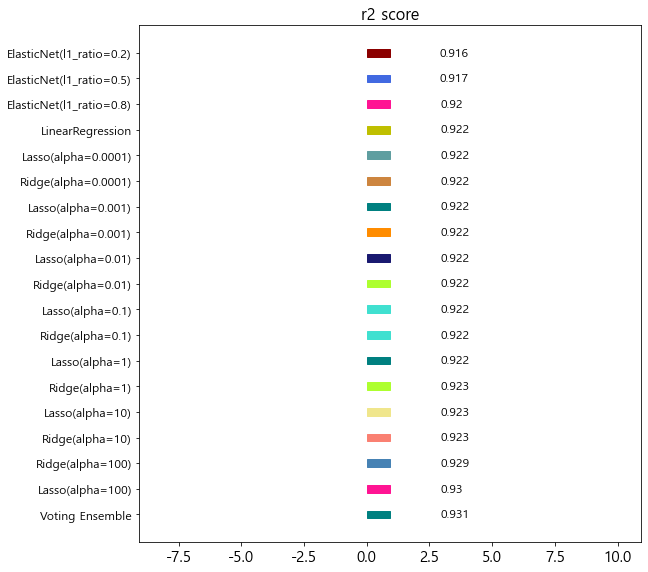

In [24]:
from sklearn.ensemble import VotingRegressor

single_models = [
    ('linear_reg', linear_reg), 
    ('ridge', ridge), 
    ('lasso', lasso), 
    ('elasticnet', elasticnet)
]

voting_regressor = VotingRegressor(single_models, n_jobs=-1)

voting_regressor.fit(x_train, y_train)

voting_pred = voting_regressor.predict(x_test)

r2_eval('Voting Ensemble', voting_pred, y_test)

#### 6. Î∞∞ÍπÖ (Bagging) ÏïôÏÉÅÎ∏î ‚ñ∂ ÎûúÎç§Ìè¨Î†àÏä§Ìä∏ (RandomForest)
* Í∞ÄÏû• ÎåÄÌëúÏ†ÅÏù¥Í≥† ÎßéÏù¥ ÌôúÏö©ÎêòÎäî Î∞∞ÍπÖ Î∞©ÏãùÏùò ÌïôÏäµ Í∏∞Î≤ï
* Î∞∞ÍπÖ Î∞©Ïãù + Í≤∞Ï†ïÌä∏Î¶¨ (Decision Tree)
* Î™®Îì† ÌîºÏ≥êÎ°ú ÌïôÏäµÌïòÏßÄ ÎßêÍ≥†, ÎûúÎç§ÌïòÍ≤å ÏÑ†ÌÉùÎêú ÏùºÎ∂ÄÏùò ÌîºÏ≥êÎ°úÎßå ÌïôÏäµ

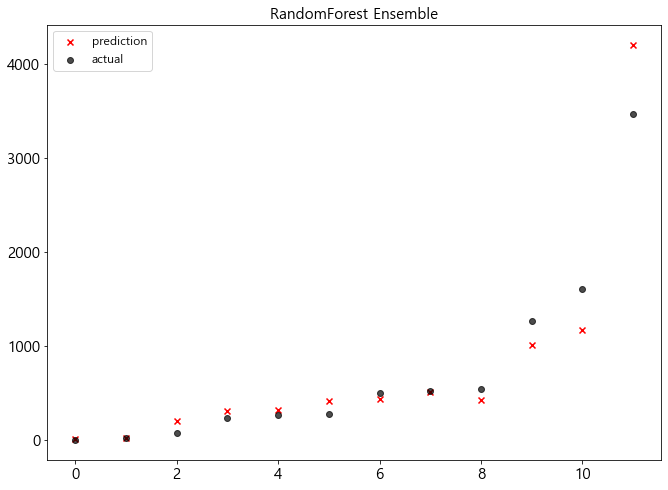

r2 score = 0.920
                       model           r2
0            Voting Ensemble 0.9312117513
1           Lasso(alpha=100) 0.9296301631
2           Ridge(alpha=100) 0.9292676297
3            Ridge(alpha=10) 0.9234800922
4            Lasso(alpha=10) 0.9228892912
5             Ridge(alpha=1) 0.9225178884
6             Lasso(alpha=1) 0.9224613302
7           Ridge(alpha=0.1) 0.9224166448
8           Lasso(alpha=0.1) 0.9224110126
9          Ridge(alpha=0.01) 0.9224064691
10         Lasso(alpha=0.01) 0.9224059062
11        Ridge(alpha=0.001) 0.9224054511
12        Lasso(alpha=0.001) 0.9224053948
13       Ridge(alpha=0.0001) 0.9224053492
14       Lasso(alpha=0.0001) 0.9224053436
15          LinearRegression 0.9224053379
16  ElasticNet(l1_ratio=0.8) 0.9201655048
17     RandomForest Ensemble 0.9198740374
18  ElasticNet(l1_ratio=0.5) 0.9168135059
19  ElasticNet(l1_ratio=0.2) 0.9157586318


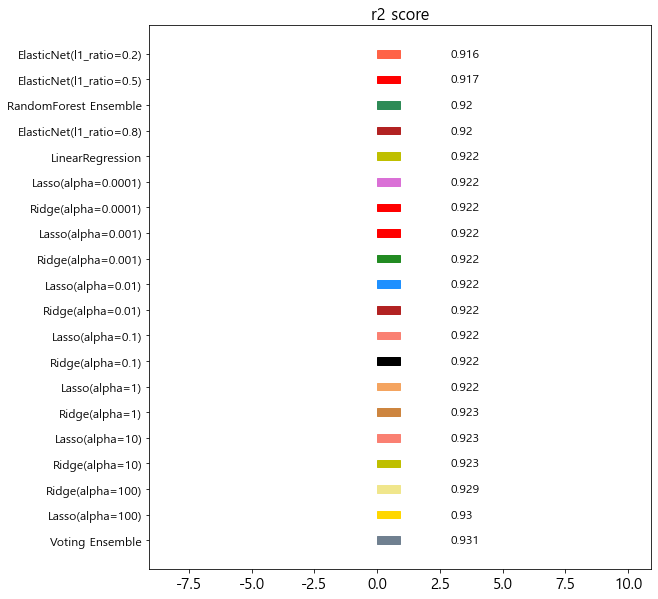

In [25]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)

rfr_pred = rfr.predict(x_test)
r2_eval('RandomForest Ensemble', rfr_pred, y_test)

In [26]:
params = {
    'n_estimators': [100, 500, 1000], 
    'max_depth': [7, 8], 
    'max_features': [0.8, 0.9],
}

In [27]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(RandomForestRegressor(), params, cv=3, n_jobs=-1, scoring='r2')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [7, 8], 'max_features': [0.8, 0.9],
                         'n_estimators': [100, 500, 1000]},
             scoring='r2')

In [28]:
grid_search.best_params_

{'max_depth': 7, 'max_features': 0.8, 'n_estimators': 100}

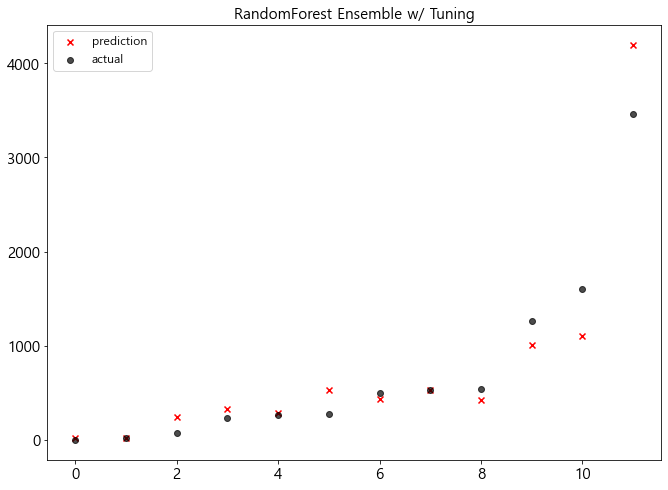

r2 score = 0.910
                              model           r2
0                   Voting Ensemble 0.9312117513
1                  Lasso(alpha=100) 0.9296301631
2                  Ridge(alpha=100) 0.9292676297
3                   Ridge(alpha=10) 0.9234800922
4                   Lasso(alpha=10) 0.9228892912
5                    Ridge(alpha=1) 0.9225178884
6                    Lasso(alpha=1) 0.9224613302
7                  Ridge(alpha=0.1) 0.9224166448
8                  Lasso(alpha=0.1) 0.9224110126
9                 Ridge(alpha=0.01) 0.9224064691
10                Lasso(alpha=0.01) 0.9224059062
11               Ridge(alpha=0.001) 0.9224054511
12               Lasso(alpha=0.001) 0.9224053948
13              Ridge(alpha=0.0001) 0.9224053492
14              Lasso(alpha=0.0001) 0.9224053436
15                 LinearRegression 0.9224053379
16         ElasticNet(l1_ratio=0.8) 0.9201655048
17            RandomForest Ensemble 0.9198740374
18         ElasticNet(l1_ratio=0.5) 0.9168135059
19 

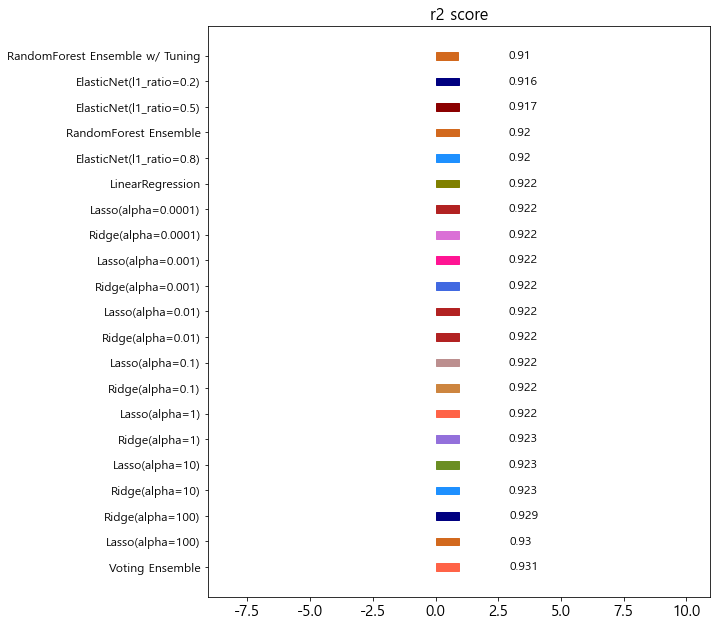

In [29]:
# ÌäúÎãù
rfr = RandomForestRegressor(random_state=42, **grid_search.best_params_)
rfr.fit(x_train, y_train)
rfr_pred = rfr.predict(x_test)
r2_eval('RandomForest Ensemble w/ Tuning', rfr_pred, y_test)

#### 7. Î∂ÄÏä§ÌåÖ (Boosting) ÏïôÏÉÅÎ∏î ‚ñ∂ GBM (GradientBoostingMachine)
* Î∂ÄÏä§ÌåÖ Í∏∞Î≤ïÎì§ Í∞ÑÏùò Ï∞®Ïù¥Îäî Ïò§Î∂ÑÎ•ò Îç∞Ïù¥ÌÑ∞Î•º Îã§Ïùå Î™®Îç∏Ïóê Ïñ¥ÎñªÍ≤å Î∞òÏòÅÌï† Í≤ÉÏù∏Í∞ÄÏùò Ï∞®Ïù¥
* Gradient BoostingÏùÄ Ïù¥Ï†Ñ Î™®Îç∏Ïùò Ïò§Î•ò(ÏûîÏ∞®, residual)Î•º ÏòàÏ∏°ÌïòÎäî ÏÉàÎ°úÏö¥ Î™®Îç∏ÏùÑ ÏÉùÏÑ±
* Loss FunctionÏùò GradientÎ•º ÌÜµÌï¥ Ïò§ÎãµÏóê Í∞ÄÏ§ëÏπò Î∂ÄÏó¨

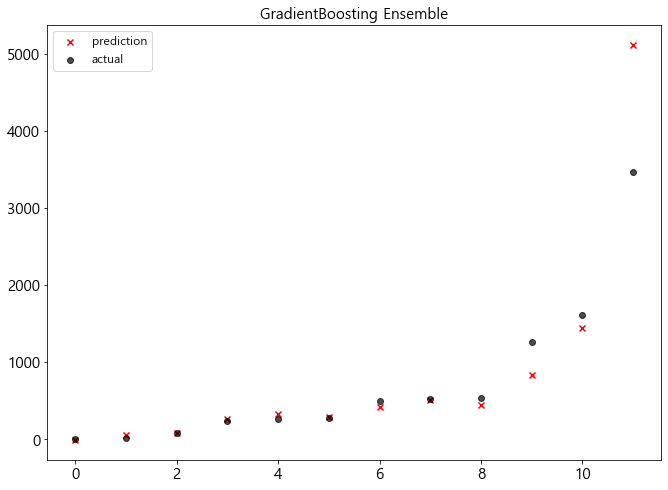

r2 score = 0.725
                              model           r2
0                   Voting Ensemble 0.9312117513
1                  Lasso(alpha=100) 0.9296301631
2                  Ridge(alpha=100) 0.9292676297
3                   Ridge(alpha=10) 0.9234800922
4                   Lasso(alpha=10) 0.9228892912
5                    Ridge(alpha=1) 0.9225178884
6                    Lasso(alpha=1) 0.9224613302
7                  Ridge(alpha=0.1) 0.9224166448
8                  Lasso(alpha=0.1) 0.9224110126
9                 Ridge(alpha=0.01) 0.9224064691
10                Lasso(alpha=0.01) 0.9224059062
11               Ridge(alpha=0.001) 0.9224054511
12               Lasso(alpha=0.001) 0.9224053948
13              Ridge(alpha=0.0001) 0.9224053492
14              Lasso(alpha=0.0001) 0.9224053436
15                 LinearRegression 0.9224053379
16         ElasticNet(l1_ratio=0.8) 0.9201655048
17            RandomForest Ensemble 0.9198740374
18         ElasticNet(l1_ratio=0.5) 0.9168135059
19 

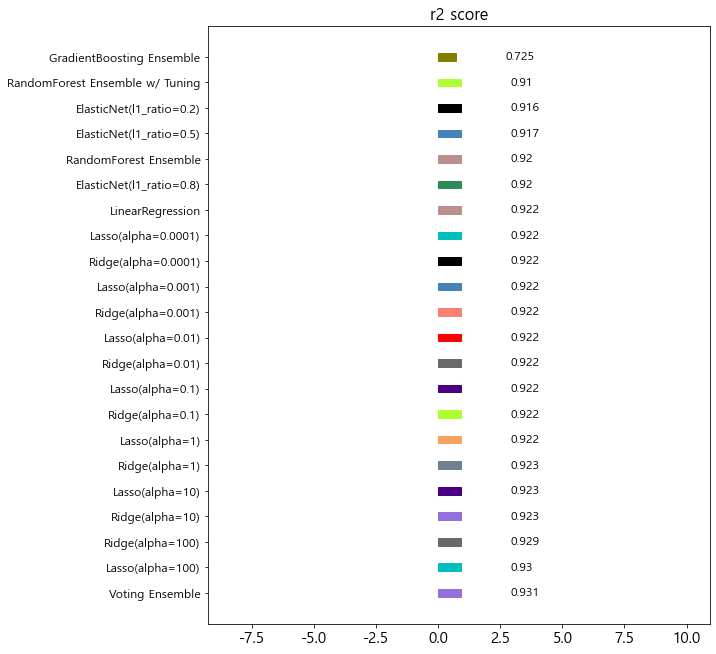

In [30]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)

gbr_pred = gbr.predict(x_test)
r2_eval('GradientBoosting Ensemble', gbr_pred, y_test)

In [31]:
params = {
    'n_estimators': [100, 500, 1000], 
    'learning_rate': [0.1, 0.05, 0.01], 
    'subsample': [0.7, 0.8, 0.9],
}

In [32]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(GradientBoostingRegressor(), params, cv=3, n_jobs=-1, scoring='r2')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'n_estimators': [100, 500, 1000],
                         'subsample': [0.7, 0.8, 0.9]},
             scoring='r2')

In [33]:
grid_search.best_params_

{'learning_rate': 0.05, 'n_estimators': 500, 'subsample': 0.7}

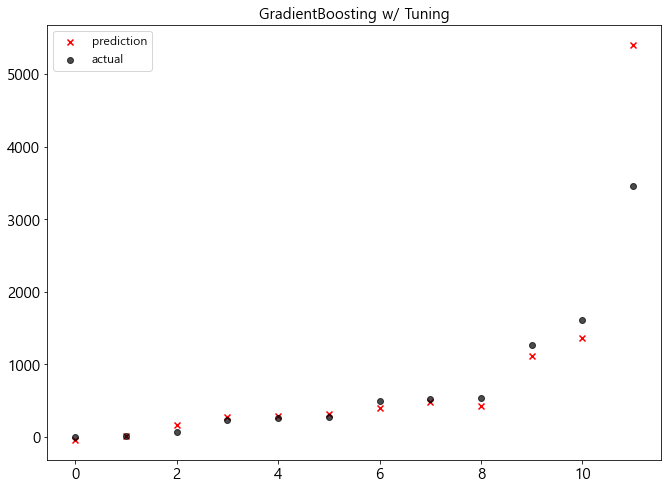

r2 score = 0.640
                              model           r2
0                   Voting Ensemble 0.9312117513
1                  Lasso(alpha=100) 0.9296301631
2                  Ridge(alpha=100) 0.9292676297
3                   Ridge(alpha=10) 0.9234800922
4                   Lasso(alpha=10) 0.9228892912
5                    Ridge(alpha=1) 0.9225178884
6                    Lasso(alpha=1) 0.9224613302
7                  Ridge(alpha=0.1) 0.9224166448
8                  Lasso(alpha=0.1) 0.9224110126
9                 Ridge(alpha=0.01) 0.9224064691
10                Lasso(alpha=0.01) 0.9224059062
11               Ridge(alpha=0.001) 0.9224054511
12               Lasso(alpha=0.001) 0.9224053948
13              Ridge(alpha=0.0001) 0.9224053492
14              Lasso(alpha=0.0001) 0.9224053436
15                 LinearRegression 0.9224053379
16         ElasticNet(l1_ratio=0.8) 0.9201655048
17            RandomForest Ensemble 0.9198740374
18         ElasticNet(l1_ratio=0.5) 0.9168135059
19 

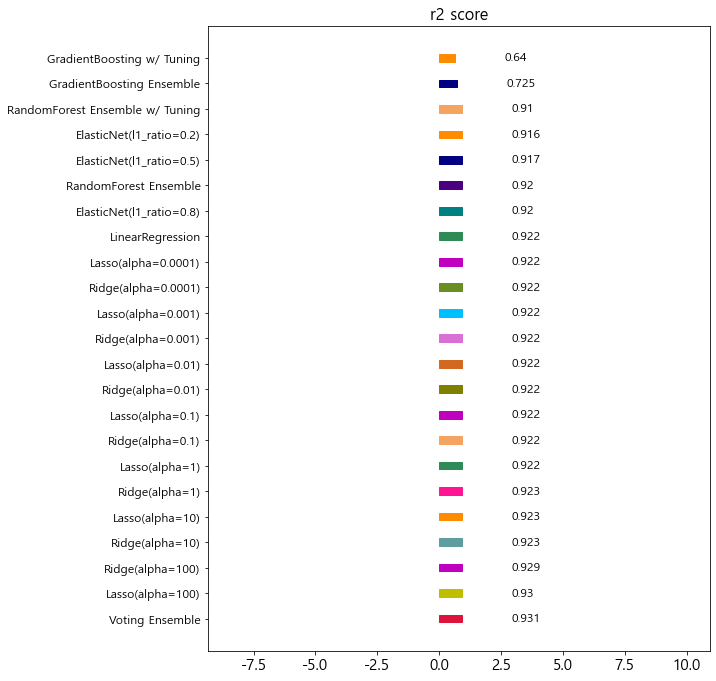

In [34]:
# ÌäúÎãù
gbr = GradientBoostingRegressor(**grid_search.best_params_)
gbr.fit(x_train, y_train)
gbr_pred = gbr.predict(x_test)
r2_eval('GradientBoosting w/ Tuning', gbr_pred, y_test)

#### 8. Î∂ÄÏä§ÌåÖ (Boosting) ÏïôÏÉÅÎ∏î ‚ñ∂ XGBoost (eXtreme Gradient Boost)
* GBM Í∏∞Î∞òÏúºÎ°ú Íµ¨ÌòÑ & Upgrade Version

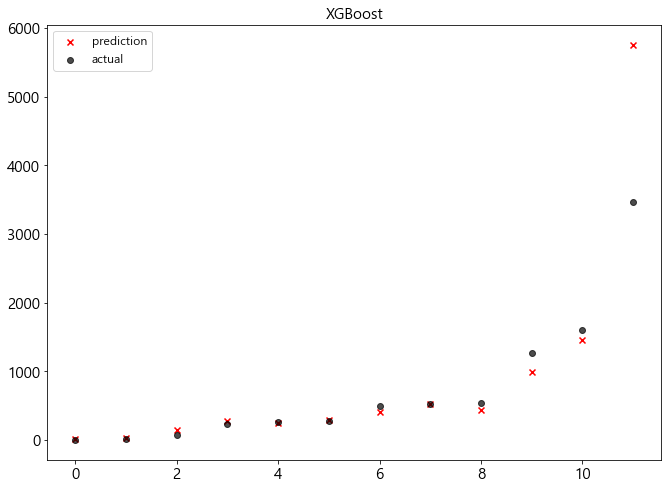

r2 score = 0.502
                              model           r2
0                   Voting Ensemble 0.9312117513
1                  Lasso(alpha=100) 0.9296301631
2                  Ridge(alpha=100) 0.9292676297
3                   Ridge(alpha=10) 0.9234800922
4                   Lasso(alpha=10) 0.9228892912
5                    Ridge(alpha=1) 0.9225178884
6                    Lasso(alpha=1) 0.9224613302
7                  Ridge(alpha=0.1) 0.9224166448
8                  Lasso(alpha=0.1) 0.9224110126
9                 Ridge(alpha=0.01) 0.9224064691
10                Lasso(alpha=0.01) 0.9224059062
11               Ridge(alpha=0.001) 0.9224054511
12               Lasso(alpha=0.001) 0.9224053948
13              Ridge(alpha=0.0001) 0.9224053492
14              Lasso(alpha=0.0001) 0.9224053436
15                 LinearRegression 0.9224053379
16         ElasticNet(l1_ratio=0.8) 0.9201655048
17            RandomForest Ensemble 0.9198740374
18         ElasticNet(l1_ratio=0.5) 0.9168135059
19 

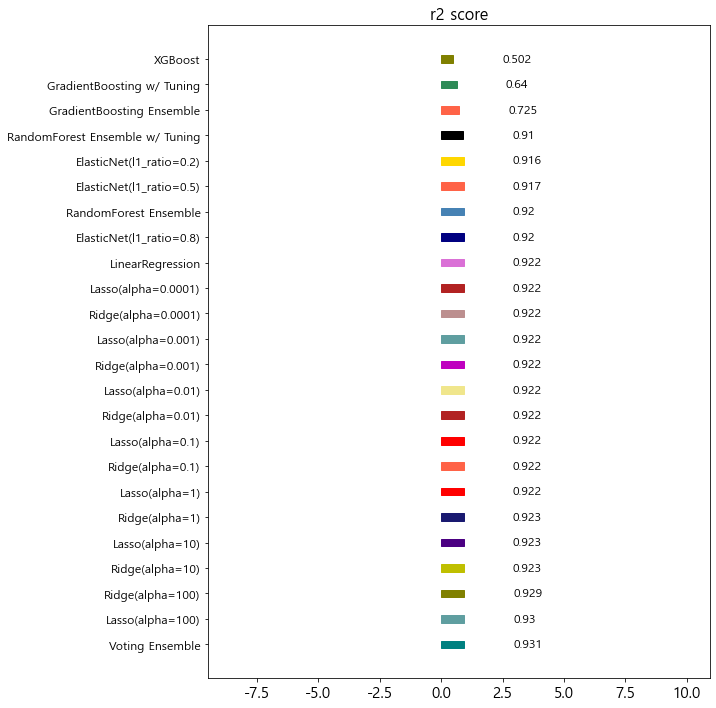

In [35]:
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state=42)
xgb.fit(x_train, y_train)
xgb_pred = xgb.predict(x_test)
r2_eval('XGBoost', xgb_pred, y_test)

In [36]:
params = {
    'n_estimators': [100, 500, 1000], 
    'learning_rate': [0.1, 0.05, 0.01], 
    'max_depth': [7, 8], 
    'subsample': [0.8, 0.9],
    'max_features': [0.8, 0.9, 1]
}

In [37]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(XGBRegressor(), params, cv=3, n_jobs=-1, scoring='r2')
grid_search.fit(x_train, y_train)

[17:26:50] WARNING: /workspace/src/learner.cc:480: 
Parameters: { max_features } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:26:50] WARNING: /workspace/src/learner.cc:480: 
Parameters: { max_features } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:26:50] WARNING: /workspace/src/learner.cc:480: 
Parameters: { max_features } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you 

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_para

In [38]:
grid_search.best_params_

{'learning_rate': 0.1,
 'max_depth': 7,
 'max_features': 0.8,
 'n_estimators': 1000,
 'subsample': 0.8}

[17:33:15] WARNING: /workspace/src/learner.cc:480: 
Parameters: { max_features } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




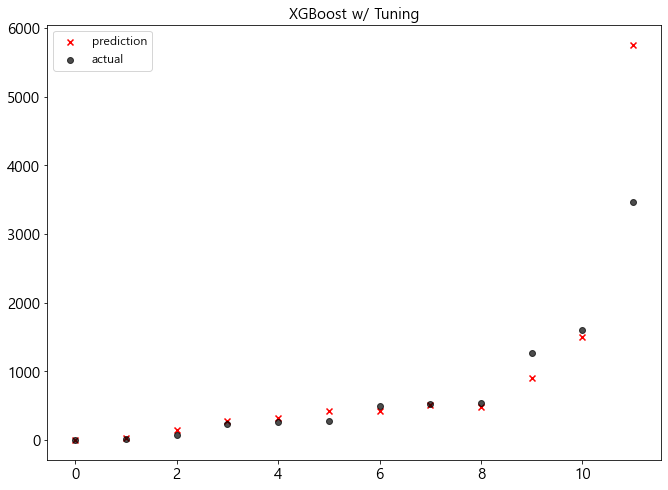

r2 score = 0.496
                              model           r2
0                   Voting Ensemble 0.9312117513
1                  Lasso(alpha=100) 0.9296301631
2                  Ridge(alpha=100) 0.9292676297
3                   Ridge(alpha=10) 0.9234800922
4                   Lasso(alpha=10) 0.9228892912
5                    Ridge(alpha=1) 0.9225178884
6                    Lasso(alpha=1) 0.9224613302
7                  Ridge(alpha=0.1) 0.9224166448
8                  Lasso(alpha=0.1) 0.9224110126
9                 Ridge(alpha=0.01) 0.9224064691
10                Lasso(alpha=0.01) 0.9224059062
11               Ridge(alpha=0.001) 0.9224054511
12               Lasso(alpha=0.001) 0.9224053948
13              Ridge(alpha=0.0001) 0.9224053492
14              Lasso(alpha=0.0001) 0.9224053436
15                 LinearRegression 0.9224053379
16         ElasticNet(l1_ratio=0.8) 0.9201655048
17            RandomForest Ensemble 0.9198740374
18         ElasticNet(l1_ratio=0.5) 0.9168135059
19 

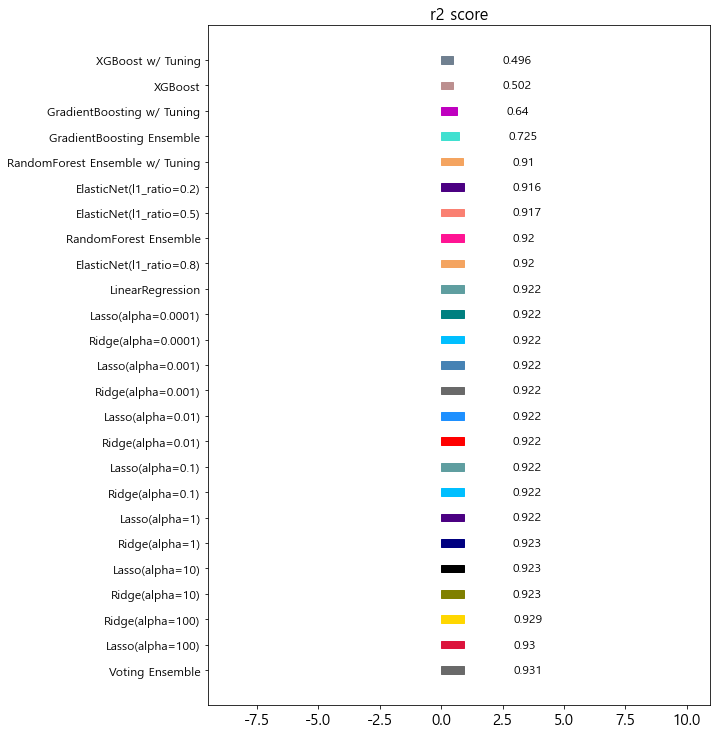

In [39]:
# ÌäúÎãù
xgb = XGBRegressor(random_state=42, **grid_search.best_params_)
xgb.fit(x_train, y_train)
xgb_pred = xgb.predict(x_test)
r2_eval('XGBoost w/ Tuning', xgb_pred, y_test)

#### 9. Î∂ÄÏä§ÌåÖ (Boosting) ÏïôÏÉÅÎ∏î ‚ñ∂ Light GBM 
* Xgboost ÎåÄÎπÑ ÏÑ±Îä•Ìñ•ÏÉÅ Î∞è ÏûêÏõêÏÜåÎ™® ÏµúÏÜåÌôî

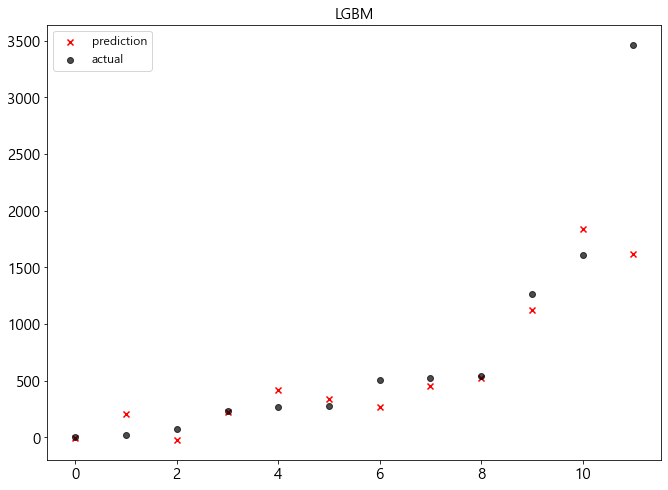

r2 score = 0.664
                              model           r2
0                   Voting Ensemble 0.9312117513
1                  Lasso(alpha=100) 0.9296301631
2                  Ridge(alpha=100) 0.9292676297
3                   Ridge(alpha=10) 0.9234800922
4                   Lasso(alpha=10) 0.9228892912
5                    Ridge(alpha=1) 0.9225178884
6                    Lasso(alpha=1) 0.9224613302
7                  Ridge(alpha=0.1) 0.9224166448
8                  Lasso(alpha=0.1) 0.9224110126
9                 Ridge(alpha=0.01) 0.9224064691
10                Lasso(alpha=0.01) 0.9224059062
11               Ridge(alpha=0.001) 0.9224054511
12               Lasso(alpha=0.001) 0.9224053948
13              Ridge(alpha=0.0001) 0.9224053492
14              Lasso(alpha=0.0001) 0.9224053436
15                 LinearRegression 0.9224053379
16         ElasticNet(l1_ratio=0.8) 0.9201655048
17            RandomForest Ensemble 0.9198740374
18         ElasticNet(l1_ratio=0.5) 0.9168135059
19 

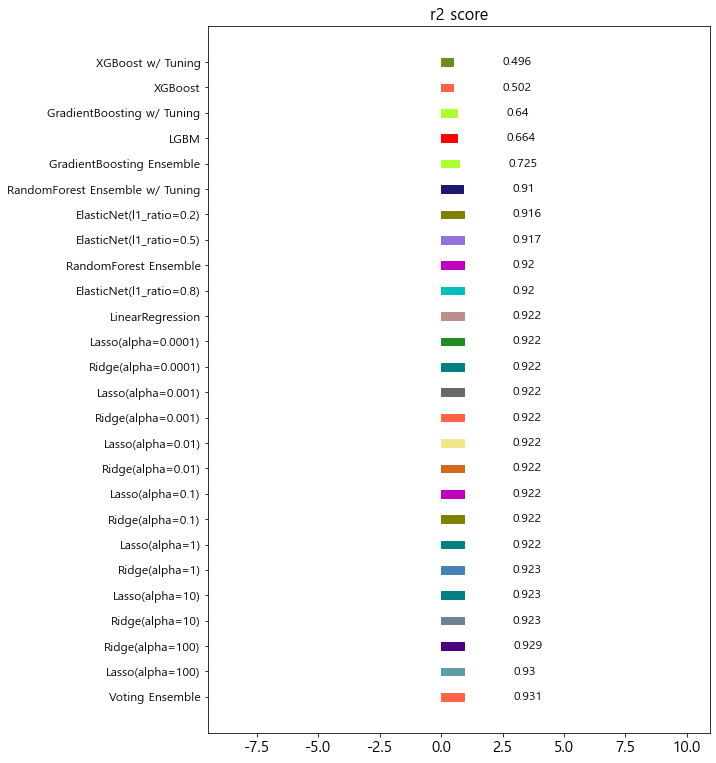

In [40]:
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor(random_state=42)
lgbm.fit(x_train, y_train)
lgbm_pred = lgbm.predict(x_test)
r2_eval('LGBM', lgbm_pred, y_test)

In [41]:
params = {
    'n_estimators': [500, 1000], 
    'learning_rate': [0.1, 0.05, 0.01], 
    'max_depth': [7, 8], 
    'colsample_bytree': [0.8, 0.9], 
    'subsample': [0.8, 0.9,],
}

In [42]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(LGBMRegressor(), params, cv=3, n_jobs=-1, scoring='r2')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9],
                         'learning_rate': [0.1, 0.05, 0.01],
                         'max_depth': [7, 8], 'n_estimators': [500, 1000],
                         'subsample': [0.8, 0.9]},
             scoring='r2')

In [43]:
grid_search.best_params_

{'colsample_bytree': 0.8,
 'learning_rate': 0.05,
 'max_depth': 7,
 'n_estimators': 500,
 'subsample': 0.8}

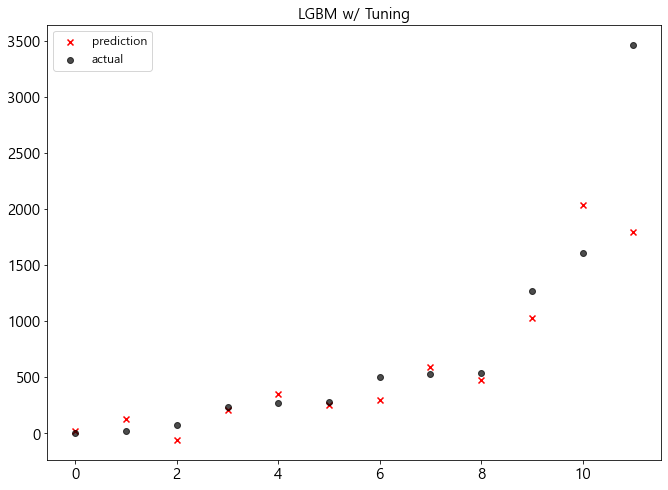

r2 score = 0.713
                              model           r2
0                   Voting Ensemble 0.9312117513
1                  Lasso(alpha=100) 0.9296301631
2                  Ridge(alpha=100) 0.9292676297
3                   Ridge(alpha=10) 0.9234800922
4                   Lasso(alpha=10) 0.9228892912
5                    Ridge(alpha=1) 0.9225178884
6                    Lasso(alpha=1) 0.9224613302
7                  Ridge(alpha=0.1) 0.9224166448
8                  Lasso(alpha=0.1) 0.9224110126
9                 Ridge(alpha=0.01) 0.9224064691
10                Lasso(alpha=0.01) 0.9224059062
11               Ridge(alpha=0.001) 0.9224054511
12               Lasso(alpha=0.001) 0.9224053948
13              Ridge(alpha=0.0001) 0.9224053492
14              Lasso(alpha=0.0001) 0.9224053436
15                 LinearRegression 0.9224053379
16         ElasticNet(l1_ratio=0.8) 0.9201655048
17            RandomForest Ensemble 0.9198740374
18         ElasticNet(l1_ratio=0.5) 0.9168135059
19 

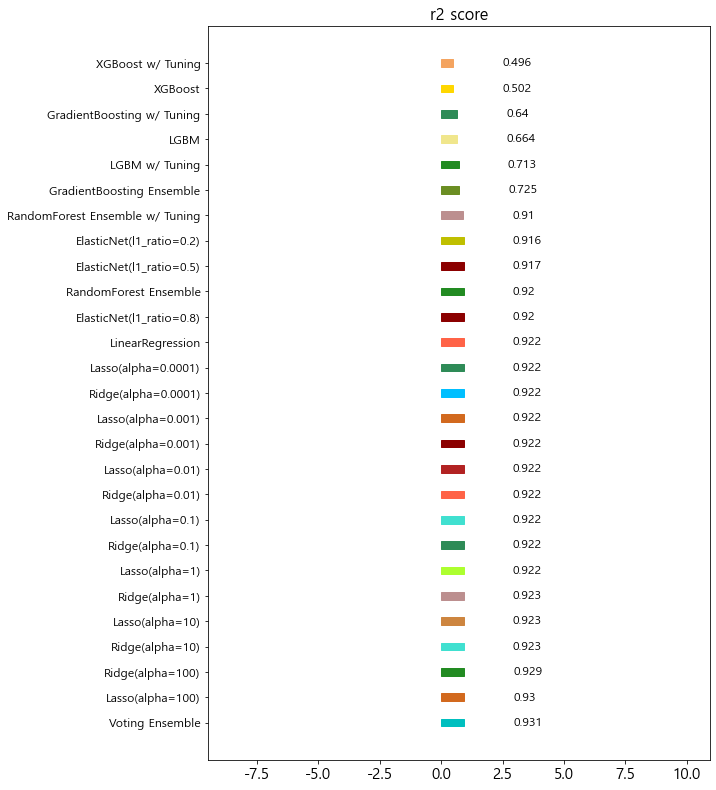

In [44]:
# ÌäúÎãù
lgbm = LGBMRegressor(random_state=42, **grid_search.best_params_)
lgbm.fit(x_train, y_train)
lgbm_pred = lgbm.predict(x_test)
r2_eval('LGBM w/ Tuning', lgbm_pred, y_test)

* r2_score Í∞ÄÏû• ÎÜíÏùÄ VotingRegressor Î™®Îç∏Î°ú ÌöåÍ∑ÄÎ∂ÑÏÑù ÏßÑÌñâ

## 3.3. ÌöåÍ∑ÄÎ∂ÑÏÑù
###  (1) ÏòàÏ∏° Îç∞Ïù¥ÌÑ∞ ÏÑ†Ï†ï ‚Äì Ï£ºÏ∞®Ïû•ÌôïÎ≥¥Ïú® Î∂ÄÏ°±Ìïú Í±∞Ï£ºÏßÄ

In [45]:
# ÏòàÏ∏° Îç∞Ïù¥ÌÑ∞ ÌïÑÌÑ∞ÎßÅ
XX = Í≤©ÏûêÎ≥Ñ_ÏµúÏ¢ÖÎç∞Ïù¥ÌÑ∞[(Í≤©ÏûêÎ≥Ñ_ÏµúÏ¢ÖÎç∞Ïù¥ÌÑ∞['Ï£ºÏ∞®Ïû•ÌôïÎ≥¥Ïú®']<1)&(Í≤©ÏûêÎ≥Ñ_ÏµúÏ¢ÖÎç∞Ïù¥ÌÑ∞['Ï£ºÏ∞®Ïû•ÌôïÎ≥¥Ïú®']!=0)&(Í≤©ÏûêÎ≥Ñ_ÏµúÏ¢ÖÎç∞Ïù¥ÌÑ∞['Í∞ÄÍµ¨Ïàò']!=0)][['Í∞ÄÍµ¨Ïàò','Ï£ºÏ∞®Í∞ÄÎä•Ï∞®ÎüâÏàò','Ï£ºÏ∞®Ïû•ÌôïÎ≥¥Ïú®','Î∂àÎ≤ïÏ£ºÏ†ïÏ∞®','Î≤ÑÏä§','Ï£ºÍ±∞ÏãúÏÑ§']]
yy = Í≤©ÏûêÎ≥Ñ_ÏµúÏ¢ÖÎç∞Ïù¥ÌÑ∞[(Í≤©ÏûêÎ≥Ñ_ÏµúÏ¢ÖÎç∞Ïù¥ÌÑ∞['Ï£ºÏ∞®Ïû•ÌôïÎ≥¥Ïú®']<1)&(Í≤©ÏûêÎ≥Ñ_ÏµúÏ¢ÖÎç∞Ïù¥ÌÑ∞['Ï£ºÏ∞®Ïû•ÌôïÎ≥¥Ïú®']!=0)&(Í≤©ÏûêÎ≥Ñ_ÏµúÏ¢ÖÎç∞Ïù¥ÌÑ∞['Í∞ÄÍµ¨Ïàò']!=0)][['Ï£ºÏ∞®Î©¥Ïàò']]

### (2) ÌöåÍ∑ÄÎ∂ÑÏÑù - VotingRegressor

In [46]:
# ÌöåÍ∑ÄÎ∂ÑÏÑù
linear_reg = LinearRegression()
ridge = Ridge(alpha=100)
lasso = Lasso(alpha=100)
elasticnet = ElasticNet(alpha=100, l1_ratio=0.8)

single_models = [
    ('linear_reg', linear_reg), 
    ('ridge', ridge), 
    ('lasso', lasso), 
    ('elasticnet', elasticnet)
]

voting_regressor = VotingRegressor(single_models, n_jobs=-1)

voting_regressor.fit(X, y)

voting_pred = voting_regressor.predict(XX)

### (3) ÍµêÏ∞®Í≤ÄÏ¶ù

In [47]:
# ÍµêÏ∞®Í≤ÄÏ¶ù
from sklearn.model_selection import cross_val_score

r2_scores = cross_val_score(voting_regressor, XX, yy, cv=3)

print("R2: ", np.round(r2_scores, 3))
print("average R2: ", np.round(np.mean(r2_scores), 3))

R2:  [0.655 0.742 0.3  ]
average R2:  0.566


## 3.4. Í≤∞Í≥ºÌï¥ÏÑù
### (1) ÌöåÍ∑ÄÎ∂ÑÏÑù Í≤∞Í≥º

In [48]:
# ÏòàÏ∏°Ïπò
pd.DataFrame(voting_pred).rename(columns={0:'ÏòàÏ∏°Ïπò'})

ÏòàÏ∏°Ïπò
0   250.1644146341
1    56.0435189944
2   176.7291879110
3   -20.6992169858
4  -131.0658965853
5  -103.8431689166
6   566.5485289270
7  -293.0089753717
8  -333.0939153353
9   521.7075605196
10  242.9853057024
11  209.5014373990
12   83.8713275717
13  154.7166745715
14  218.4910181089
15 -170.1227722049
16 -331.6836789988
17 -240.7334312729
18  325.2339217054
19  302.4178176859
20   64.6517155604
21  338.3177126791
22  -61.3198072674
23  398.6949152179
24 -113.8029612888
25 -304.7364402014
26 -251.6238473851
27 1582.6863316929
28  340.8119052698
29  246.3979844932
30 -102.1835248712
31  184.6296994488
32   30.8664929763
33 -120.1207015057
34  157.9295580071
35 -215.3659318474
36 -340.2247624064
37  -19.7030016887
38  -45.6797874927
39 -215.2303039657
40 -221.7374331897
41 -220.1408947011
42  140.9371629738
43 1207.5961449386
44 -225.5564099930
45   83.2079914870
46 -121.8334042346
47 -158.3634107969
48 -174.8201897925
49 -146.8958668237
50   41.8335943232
51  -40.4265275206
52  -93.8240289074
53  353.9462301887
54 -180.6271951102
55  110.6816255480
56 1810.7339623367
57  631.2483642710
58   16.4585273854
59  374.2003012987
60  341.7166053344
61  378.6278369359
62  -15.5667872888
63  149.6421454930
64  -40.2691989468
65  566.4265353678
66  -28.7816617460
67   16.7575010195
68 -142.7827064492
69 -179.3652352790
70 -191.3441176447
71 1015.3679894521
72  -95.5153680595
73  140.3578329646
74   81.6459811037
75 1112.0297148447
76 -196.9756340610
77  184.3699356381
78  517.4783386658
79 1370.7118261306
80  353.8522503964
81  512.2775008551
82 1114.8241471581
83  400.0763548496
84  475.3539941826
85  459.2958188218
86  348.6653102935
87 -157.4079871323
88  418.9493672405
89  754.6015872607
90  271.1255325844
91  416.2962383391
92  -41.5794071724
93  551.4212043754
94  298.4026550132
95  446.3790818390

In [49]:
# Ïã§Ï†ú Ï£ºÏ∞®Î©¥Ïàò
yy

Ï£ºÏ∞®Î©¥Ïàò
3   147.0000000000
13  316.0000000000
27   10.0000000000
28   21.0000000000
29   76.0000000000
33    7.0000000000
34  135.0000000000
36  217.0000000000
37   41.0000000000
48  456.0000000000
49   74.0000000000
50  253.0000000000
51  124.0000000000
53  164.0000000000
54   21.0000000000
55    7.0000000000
57   39.0000000000
58   46.0000000000
70  129.0000000000
71  155.0000000000
72   69.0000000000
74  294.0000000000
75   64.0000000000
76  245.0000000000
77   38.0000000000
80    6.0000000000
93    2.0000000000
94  868.0000000000
95  218.0000000000
97   26.0000000000
98   37.0000000000
99  102.0000000000
100  39.0000000000
101  34.0000000000
103  42.0000000000
106   2.0000000000
120  14.0000000000
121  83.0000000000
122  79.0000000000
124  27.0000000000
125  13.0000000000
126   4.0000000000
127  31.0000000000
128 537.0000000000
130   1.0000000000
132 108.0000000000
133  33.0000000000
147  51.0000000000
150  63.0000000000
152   3.0000000000
155  47.0000000000
158  41.0000000000
159 109.0000000000
175 186.0000000000
180  23.0000000000
181  63.0000000000
182 422.0000000000
183 171.0000000000
184  94.0000000000
185 237.0000000000
186  90.0000000000
197  10.0000000000
200 114.0000000000
207  57.0000000000
208 115.0000000000
209 407.0000000000
227  32.0000000000
233 100.0000000000
239  11.0000000000
253   4.0000000000
255   2.0000000000
256 132.0000000000
262  53.0000000000
266  65.0000000000
267 125.0000000000
294 254.0000000000
295  10.0000000000
401 124.0000000000
402 233.0000000000
403 188.0000000000
404  90.0000000000
423 345.0000000000
425 188.0000000000
441 256.0000000000
443 338.0000000000
444 243.0000000000
445 101.0000000000
446  10.0000000000
447 337.0000000000
463 445.0000000000
464 219.0000000000
465 163.0000000000
466  31.0000000000
467  36.0000000000
482 205.0000000000
483 268.0000000000

###   (2) 'Ï£ºÏ∞®Ïû•ÌïÑÏöî' ÏπºÎüº ÏÉùÏÑ± = (ÌöåÍ∑ÄÎ∂ÑÏÑù)ÏòàÏ∏°Ïπò ‚Äì (ÌòÑÏû¨)Ï£ºÏ∞®Î©¥Ïàò

In [50]:
Ï£ºÏ∞®ÏòàÏ∏° = pd.concat([yy.reset_index(), pd.DataFrame(voting_pred).rename(columns={0:'ÏòàÏ∏°Ïπò'})], axis=1)
Ï£ºÏ∞®ÏòàÏ∏°['Ï£ºÏ∞®Ïû•ÌïÑÏöî'] = 0
Ï£ºÏ∞®ÏòàÏ∏°['Ï£ºÏ∞®Ïû•ÌïÑÏöî'] = Ï£ºÏ∞®ÏòàÏ∏°['ÏòàÏ∏°Ïπò']-Ï£ºÏ∞®ÏòàÏ∏°['Ï£ºÏ∞®Î©¥Ïàò']
Ï£ºÏ∞®ÏòàÏ∏°.sort_values(by='Ï£ºÏ∞®Ïû•ÌïÑÏöî', ascending=False)

index           Ï£ºÏ∞®Î©¥Ïàò             ÏòàÏ∏°Ïπò           Ï£ºÏ∞®Ïû•ÌïÑÏöî
56    182 422.0000000000 1810.7339623367 1388.7339623367
79    403 188.0000000000 1370.7118261306 1182.7118261306
82    425 188.0000000000 1114.8241471581  926.8241471581
71    256 132.0000000000 1015.3679894521  883.3679894521
75    294 254.0000000000 1112.0297148447  858.0297148447
27     94 868.0000000000 1582.6863316929  714.6863316929
43    128 537.0000000000 1207.5961449386  670.5961449386
93    467  36.0000000000  551.4212043754  515.4212043754
57    183 171.0000000000  631.2483642710  460.2483642710
6      34 135.0000000000  566.5485289270  431.5485289270
61    197  10.0000000000  378.6278369359  368.6278369359
89    463 445.0000000000  754.6015872607  309.6015872607
78    402 233.0000000000  517.4783386658  284.4783386658
80    404  90.0000000000  353.8522503964  263.8522503964
91    465 163.0000000000  416.2962383391  253.2962383391
60    186  90.0000000000  341.7166053344  251.7166053344
86    445 101.0000000000  348.6653102935  247.6653102935
29     97  26.0000000000  246.3979844932  220.3979844932
85    444 243.0000000000  459.2958188218  216.2958188218
14     54  21.0000000000  218.4910181089  197.4910181089
18     70 129.0000000000  325.2339217054  196.2339217054
95    483 268.0000000000  446.3790818390  178.3790818390
10     49  74.0000000000  242.9853057024  168.9853057024
53    175 186.0000000000  353.9462301887  167.9462301887
81    423 345.0000000000  512.2775008551  167.2775008551
2      27  10.0000000000  176.7291879110  166.7291879110
65    209 407.0000000000  566.4265353678  159.4265353678
23     76 245.0000000000  398.6949152179  153.6949152179
19     71 155.0000000000  302.4178176859  147.4178176859
83    441 256.0000000000  400.0763548496  144.0763548496
84    443 338.0000000000  475.3539941826  137.3539941826
59    185 237.0000000000  374.2003012987  137.2003012987
28     95 218.0000000000  340.8119052698  122.8119052698
34    103  42.0000000000  157.9295580071  115.9295580071
42    127  31.0000000000  140.9371629738  109.9371629738
0       3 147.0000000000  250.1644146341  103.1644146341
94    482 205.0000000000  298.4026550132   93.4026550132
63    207  57.0000000000  149.6421454930   92.6421454930
31     99 102.0000000000  184.6296994488   82.6296994488
88    447 337.0000000000  418.9493672405   81.9493672405
73    266  65.0000000000  140.3578329646   75.3578329646
9      48 456.0000000000  521.7075605196   65.7075605196
77    401 124.0000000000  184.3699356381   60.3699356381
90    464 219.0000000000  271.1255325844   52.1255325844
55    181  63.0000000000  110.6816255480   47.6816255480
21     74 294.0000000000  338.3177126791   44.3177126791
20     72  69.0000000000   64.6517155604   -4.3482844396
50    155  47.0000000000   41.8335943232   -5.1664056768
32    100  39.0000000000   30.8664929763   -8.1335070237
13     53 164.0000000000  154.7166745715   -9.2833254285
45    132 108.0000000000   83.2079914870  -24.7920085130
12     51 124.0000000000   83.8713275717  -40.1286724283
3      28  21.0000000000  -20.6992169858  -41.6992169858
74    267 125.0000000000   81.6459811037  -43.3540188963
11     50 253.0000000000  209.5014373990  -43.4985626010
66    227  32.0000000000  -28.7816617460  -60.7816617460
92    466  31.0000000000  -41.5794071724  -72.5794071724
58    184  94.0000000000   16.4585273854  -77.5414726146
51    158  41.0000000000  -40.4265275206  -81.4265275206
67    233 100.0000000000   16.7575010195  -83.2424989805
37    121  83.0000000000  -19.7030016887 -102.7030016887
5      33   7.0000000000 -103.8431689166 -110.8431689166
38    122  79.0000000000  -45.6797874927 -124.6797874927
22     75  64.0000000000  -61.3198072674 -125.3198072674
62    200 114.0000000000  -15.5667872888 -129.5667872888
30     98  37.0000000000 -102.1835248712 -139.1835248712
72    262  53.0000000000  -95.5153680595 -148.5153680595
49    152   3.0000000000 -146.8958668237 -149.8958668237
24     77  38.0000000000 -113.8029612888 -151.8

###  (3) Ï£ºÏ∞®ÏàòÏöî Í≤©Ïûê ÌïÑÌÑ∞ÎßÅ Î∞è Ïö∞ÏÑ†ÏàúÏúÑ ÏÑ†Ï†ï

In [51]:
# Í≤©Ïûê Ï∂îÍ∞Ä
GetCompasData('SBJ_2107_003', '15', '15.Î∂ÄÏÇ∞ÏãúÎÇ®Íµ¨_Í≤©Ïûê(300X300).geojson')
df= gpd.read_file("15.Î∂ÄÏÇ∞ÏãúÎÇ®Íµ¨_Í≤©Ïûê(300X300).geojson")

def multipolygon_to_coordinates(x): 
    lon, lat = x[0].exterior.xy 
    return [[x, y] for x, y in zip(lon, lat)] 
def polygon_to_coordinates(x): 
    lon, lat = x.exterior.xy 
    return [[x, y] for x, y in zip(lon, lat)] 

# geometryÎ•º coordinate ÌòïÌÉúÎ°ú
df['coordinates'] = df['geometry'].apply(polygon_to_coordinates)

# 300X300 gridÏóêÏÑú central point Ï∞æÍ∏∞
df_list = []
for i in df['geometry']:
    cent = i.centroid
    df_list.append(cent)
df['geo_cent'] = 0
df['geo_cent'] = df_list 

# Ïâ¨Ïö¥ Î∂ÑÏÑùÏùÑ ÏúÑÌïú ÏûÑÏùòÏùò grid id
df['grid_id']=0
idx = []
for i in range(len(df)):
    idx.append(i)
df['grid_id'] = pd.DataFrame(idx)

# Ï†ïÍ∑úÌôî
Ï£ºÏ∞®ÏòàÏ∏°_k = Ï£ºÏ∞®ÏòàÏ∏°.sort_values(by='Ï£ºÏ∞®Ïû•ÌïÑÏöî', ascending=False)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
mm_scaler = scaler.fit(Ï£ºÏ∞®ÏòàÏ∏°_k[['Ï£ºÏ∞®Ïû•ÌïÑÏöî']] )
df_mm = mm_scaler.transform(Ï£ºÏ∞®ÏòàÏ∏°_k[['Ï£ºÏ∞®Ïû•ÌïÑÏöî']])
Ï£ºÏ∞®ÏòàÏ∏°_k['Ï†ïÍ∑úÌôî_Ï£ºÏ∞®Ïû•ÌïÑÏöî'] = df_mm

Ï£ºÏ∞®ÏòàÏ∏°_k = pd.merge(df, Ï£ºÏ∞®ÏòàÏ∏°_k.rename(columns={'index':'grid_id'}), on='grid_id', how='inner')
Ï£ºÏ∞®ÏòàÏ∏°_k.head(2)

id                                           geometry  \
0   9  POLYGON ((129.06301 35.14370, 129.06570 35.143...   
1  44  POLYGON ((129.06570 35.14370, 129.06840 35.143...   

                                         coordinates  \
0  [[129.06300949513243, 35.14369554725283], [129...   
1  [[129.0657044409848, 35.14369554725283], [129....   

                                      geo_cent  grid_id           Ï£ºÏ∞®Î©¥Ïàò  \
0  POINT (129.0643569680586 35.14259368895314)        3 147.0000000000   
1   POINT (129.067051913911 35.14259368895314)       13 316.0000000000   

             ÏòàÏ∏°Ïπò           Ï£ºÏ∞®Ïû•ÌïÑÏöî    Ï†ïÍ∑úÌôî_Ï£ºÏ∞®Ïû•ÌïÑÏöî  
0 250.1644146341  103.1644146341 0.3229364954  
1  56.0435189944 -259.9564810056 0.1316937061

In [52]:
rlt = pd.merge(Í≤©ÏûêÎ≥Ñ_ÏµúÏ¢ÖÎç∞Ïù¥ÌÑ∞, Ï£ºÏ∞®ÏòàÏ∏°_k, on='grid_id', how='inner').sort_values(by='Í∞ÄÍµ¨Ïàò')

# ÌïÑÏöîÌïú Ï£ºÏ∞®Î©¥Ïàò('Ï£ºÏ∞®Ïû•ÌïÑÏöî') 0Î≥¥Îã§ ÏûëÍ±∞ÎÇò Í∞ôÏùÄ Í∞í Î≤ÑÎ¶º + Í∞ÄÍµ¨Ïàò ÌïòÏúÑ 25% Î≤ÑÎ¶º
rlt1 = rlt[(rlt['Ï£ºÏ∞®Ïû•ÌïÑÏöî']>0)&(rlt['Í∞ÄÍµ¨Ïàò']>=rlt['Í∞ÄÍµ¨Ïàò'].describe()[4])]

# Í∞ÄÍµ¨Ïàò& Ï£ºÏ∞®Ïû•ÌïÑÏöîÏàòÎ°ú ÌïÑÌÑ∞ÎßÅÌï®.
rlt1['Î∂àÎ≤ïÏ£ºÏ†ïÏ∞®ÏàúÏúÑ']=np.nan
rlt1['Ï£ºÏ∞®Ïû•ÌôïÎ≥¥Ïú®ÏàúÏúÑ']=np.nan

# ÏµúÏ¢ÖÏàúÏúÑ Ï†ïÌïòÍ∏∞
rlt1=rlt1.sort_values(by='Ï†ïÍ∑úÌôî_Î∂àÎ≤ïÏ£ºÏ†ïÏ∞®',ascending=False)# ÎÜíÏùÑÏàòÎ°ù ÏàúÏúÑ ÎÇÆÏùå.
rlt1['Î∂àÎ≤ïÏ£ºÏ†ïÏ∞®ÏàúÏúÑ']=rlt1.reset_index().index+1
rlt1=rlt1.sort_values(by='Ï£ºÏ∞®Ïû•ÌôïÎ≥¥Ïú®') # ÌôïÎ≥¥Ïú®Ïù¥ ÎÇÆÏùÑÏàòÎ°ù ÏàúÏúÑÎÜíÏùå.
rlt1['Ï£ºÏ∞®Ïû•ÌôïÎ≥¥Ïú®ÏàúÏúÑ']=rlt1.reset_index().index+1
rlt1['ÏµúÏ¢ÖÏàúÏúÑ']=rlt1.Î∂àÎ≤ïÏ£ºÏ†ïÏ∞®ÏàúÏúÑ+rlt1.Ï£ºÏ∞®Ïû•ÌôïÎ≥¥Ïú®ÏàúÏúÑ

rlt2 = rlt1.sort_values(by='ÏµúÏ¢ÖÏàúÏúÑ')
# rlt2.to_csv('ÏµúÏ¢Ö_1Ï∞®ÌöåÍ∑Ä_46Í∞ú.csv')
# rlt2.id_x.values

Í≤©ÏûêÏàúÏúÑ = rlt2.rename(columns={'id_y':'id', 'geometry_y':'geometry','coordinates_y':'coordinates', 'geo_cent_y':'geo_cent'})[['id','geometry','coordinates','geo_cent','grid_id','ÌñâÏ†ïÎèô','ÏµúÏ¢ÖÏàúÏúÑ']]
Í≤©ÏûêÏàúÏúÑ.head(2)

id                                           geometry  \
82  618  POLYGON ((129.10882 35.11284, 129.11152 35.112...   
10  113  POLYGON ((129.07109 35.14590, 129.07379 35.145...   

                                          coordinates  \
82  [[129.10882357462253, 35.11283808609127], [129...   
10  [[129.0710943326895, 35.14589920418718], [129....   

                                       geo_cent  grid_id   ÌñâÏ†ïÎèô  ÏµúÏ¢ÖÏàúÏúÑ  
82  POINT (129.1101710475487 35.11173581022271)      425  Ïö©Ìò∏4Îèô    16  
10     POINT (129.0724418056157 35.14479737572)       49  Î¨∏ÌòÑ1Îèô    21

# 4. ÏµúÏ¢ÖÍ≤∞Í≥º Î∞è ÌèâÍ∞Ä
## 4.1. Ï£ºÏ∞®Ïö©Îüâ Ï†úÏãú

###  (1) Í≤©ÏûêÎ≥Ñ Ï£ºÏ∞®Ïö©Îüâ Ï†úÏïà

*      Í∞ÄÎä•Ï£ºÏ∞®Î©¥Ïàò = Î©¥Ï†ÅÌï©Í≥Ñ($m^2$) / Ï£ºÏ∞®1ÎåÄÎãπ ÏÜåÏöîÎ©¥Ï†Å($m^2$)
*      ÌïÑÏöîÏ£ºÏ∞®Î©¥Ïàò = Ï£ºÏ∞®Ïû•ÌïÑÏöîÎ©¥Ïàò

In [53]:
# 2Ï∞® ÌïÑÌÑ∞ÎßÅ > ÏµúÏ¢ÖÍ≤©Ïûê 29Í∞ú ÎèÑÏ∂ú
ÏµúÏ¢ÖÍ≤©Ïûê29Í∞ú = pd.read_csv('ÏµúÏ¢ÖÎç∞Ïù¥ÌÑ∞/ÏµúÏ¢Ö_1Ï∞®ÌöåÍ∑Ä_46Í∞ú.csv')

# ÏàúÏúÑÎ≥Ñ Ï£ºÏ∞®ÏàòÏöî Í≤©Ïûê ÏãúÍ∞ÅÌôî
ÏµúÏ¢ÖÍ≤©Ïûê29Í∞ú_ÏãúÍ∞ÅÌôî = ÏµúÏ¢ÖÍ≤©Ïûê29Í∞ú.drop(['Unnamed: 0','geometry','coordinates','geo_cent','grid_id'], axis=1)
ÏµúÏ¢ÖÍ≤©Ïûê29Í∞ú_ÏãúÍ∞ÅÌôî = pd.merge(Í≤©ÏûêÏàúÏúÑ, ÏµúÏ¢ÖÍ≤©Ïûê29Í∞ú_ÏãúÍ∞ÅÌôî, on='id', how='inner')
ÏµúÏ¢ÖÍ≤©Ïûê29Í∞ú_ÏãúÍ∞ÅÌôî.head(2)

id                                           geometry  \
0  618  POLYGON ((129.10882 35.11284, 129.11152 35.112...   
1  113  POLYGON ((129.07109 35.14590, 129.07379 35.145...   

                                         coordinates  \
0  [[129.10882357462253, 35.11283808609127], [129...   
1  [[129.0710943326895, 35.14589920418718], [129....   

                                      geo_cent  grid_id   ÌñâÏ†ïÎèô  ÏµúÏ¢ÖÏàúÏúÑ  \
0  POINT (129.1101710475487 35.11173581022271)      425  Ïö©Ìò∏4Îèô    16   
1     POINT (129.0724418056157 35.14479737572)       49  Î¨∏ÌòÑ1Îèô    21   

            Î©¥Ï†ÅÌï©Í≥Ñ       Í∞ÄÎä•Ï£ºÏ∞®Î©¥Ïàò         ÌïÑÏöîÏ£ºÏ∞®Î©¥Ïàò  
0 117.1000000000 3.9033333333 216.2958188218  
1 147.0000000000 4.9000000000 103.1644146341

## 4.2. Ï£ºÏ∞®ÏàòÏöî ÏòàÏÉÅÍ≤©Ïûê ÏãúÍ∞ÅÌôî

###  (1) ÏµúÏ¢ÖÍ≤©Ïûê ÏÑ†Ï†ï

* Ï£ºÏ∞®Í∞ÄÎä•Ìïú 29Í∞ú Í≤©Ïûê ÏÑ†Ï†ï

* Î∂âÏùÄÏÉâÏù¥ ÏßÑÌï†ÏàòÎ°ù  Ïö∞ÏÑ†ÏàúÏúÑ ÎÜíÏùÄ Í≤©Ïûê

In [54]:
import pydeck as pdk

# Make layer
layer = pdk.Layer( 'PolygonLayer', 
                  ÏµúÏ¢ÖÍ≤©Ïûê29Í∞ú_ÏãúÍ∞ÅÌôî,
                  get_polygon='coordinates',
                  get_fill_color='[ÏµúÏ¢ÖÏàúÏúÑ * 255, 0, 0, (84 - ÏµúÏ¢ÖÏàúÏúÑ) * 4]', # Î∂âÏùÄÏÉâÏù¥ ÏßÑÌï†ÏàòÎ°ù Ï£ºÏ∞®Ïû•ÏÑ§Ïπò ÏãúÍ∏â
                  pickable=True,
                  auto_highlight=True 
                 ) 

# Set the viewport location 
center = [129.09209955486202, 35.12048306804342] 
view_state = pdk.ViewState( 
    longitude=center[0], 
    latitude=center[1], 
    zoom=11
) 

# Render 
map30 = pdk.Deck(layers=[layer], initial_view_state=view_state,
             map_style='mapbox://styles/mapbox/outdoors-v11',
             mapbox_key = "pk.eyJ1IjoiamNsYXJhODExIiwiYSI6ImNrZzF4bWNhdTBpNnEydG54dGpxNDEwajAifQ.XWxOKQ-2HqFBVBYa-XoS-g"
            )
map30.to_html()

In [55]:
# ÌäπÏ†ï Íµ¨Ïó≠Ïóê Î™∞Î¶∞ ÌòïÌÉú ‚Üí  ÎèôÎ≥Ñ Ï£ºÏ∞®Ï†úÏïà
ÏµúÏ¢ÖÍ≤©Ïûê29Í∞ú_ÏãúÍ∞ÅÌôî.ÌñâÏ†ïÎèô.value_counts()

Ïö©Ìò∏3Îèô    6
Î¨∏ÌòÑ1Îèô    3
Î¨∏ÌòÑ4Îèô    3
Ïö©Ìò∏2Îèô    3
Î¨∏ÌòÑ2Îèô    2
ÎåÄÏó∞4Îèô    2
Ïö©Ìò∏4Îèô    2
Í∞êÎßå2Îèô    2
Í∞êÎßå1Îèô    2
Ïö©ÎãπÎèô     1
Î¨∏ÌòÑ3Îèô    1
ÎåÄÏó∞6Îèô    1
Ïö©Ìò∏1Îèô    1
Name: ÌñâÏ†ïÎèô, dtype: int64

## 4.3. ÎèôÎ≥Ñ Ï£ºÏ∞®Ï†úÏïà

###  (1) Ïö©Ìò∏Îèô
   * 3Ï∏µ Ïù¥ÎÇ¥ ÎÇÆÏùÄ Í±¥Î¨º Î∞ÄÏßë ÏßÄÏó≠ ‚Üí ÎÖ∏ÌõÑÌôî Îêú Í±¥Î¨º Îß§ÏûÖ ÌõÑ Ï£ºÏ∞®Ïû• ÏÑ§Ïπò
   ![nn](Ïö©Ìò∏Îèô.png)

###  (2) Ïö©ÎãπÎèô
* Î∂ÄÍ≤ΩÎåÄÌïôÍµê Ïö©ÎãπÏ∫†ÌçºÏä§ & ÏÇ∞/Ìï≠Íµ¨ ÏúÑÏπò ‚Üí ÏÇ¨Ïö©ÎêòÏßÄ ÏïäÎäî ÌÜ†ÏßÄ Îß§ÏûÖ ÌõÑ Ï£ºÏ∞®Ïû•ÏúºÎ°ú ÏÑ§Ïπò
![nn](Ïö©ÎãπÎèô.png)

###  (3) Í∞êÎßåÎèô
*    ÏÇ∞/Ìï≠Íµ¨ ÏúÑÏπò & Ï¢ÅÍ≥† Î≥µÏû°Ìïú ÏßÄÌòï ‚Üí Ïù¥Ï†ÑÌïú Î∂ÄÏÇ∞Ïô∏ÎåÄ Ï∫†ÌçºÏä§ Î∂ÄÏßÄ ÌôúÏö©Ìïú Ï£ºÏ∞®Ïû• ÏÑ§Ïπò
![nn](Í∞êÎßåÎèô.png)

###  (4) Î¨∏ÌòÑÎèô
* Î¨∏ÌòÑÍ∏àÏúµÎã®ÏßÄ Ï°∞ÏÑ± & Ìô©Î†πÏÇ∞ Ïù¥Ïö© Îì±ÏÇ∞Í∞ù ‚Üí Í∏àÏúµÎã®ÏßÄ Ï£ºÎ≥Ä Í±¥Î¨º Îß§ÏûÖ, ÎèåÏÇ∞Í≥µÏõê Ïù¥Ïö© Ï£ºÏ∞®Ïû• ÏÑ§Ïπò
![nn](Î¨∏ÌòÑÎèô.png)

###  (5) ÎåÄÏó∞Îèô
* Ìô©Î†πÏÇ∞ Ïù¥Ïö© Îì±ÏÇ∞Í∞ù ‚Üí ÎÇÆÏùÄ Í≥†ÎèÑÏùò ÏÇ∞ÏùÑ Ïù¥Ïö©Ìïú Ï£ºÏ∞®Ïû• ÏÑ§Ïπò
![nn](ÎåÄÏó∞Îèô.png)

# 5. Î∂ÑÏÑùÍ≤∞Í≥º
## 5.1. Ï¢åÌëú 30Í∞ú ÏÑ†Ï†ï

In [65]:
ÏµúÏ¢ÖÏ¢åÌëú = ÏµúÏ¢ÖÍ≤©Ïûê29Í∞ú_ÏãúÍ∞ÅÌôî.drop(['id','coordinates','grid_id','geo_cent','Î©¥Ï†ÅÌï©Í≥Ñ','ÌïÑÏöîÏ£ºÏ∞®Î©¥Ïàò','ÏµúÏ¢ÖÏàúÏúÑ'], axis=1)
ÏµúÏ¢ÖÏ¢åÌëú = ÏµúÏ¢ÖÏ¢åÌëú.rename(columns={'Í∞ÄÎä•Ï£ºÏ∞®Î©¥Ïàò':'Ï£ºÏ∞®Ïû• Î©¥Ï†Å(„é°)','ÌñâÏ†ïÎèô':'Ï£ºÏ∞®Ïû• ÏúÑÏπò'})

# Ï£ºÏ∞®Ïö©Îüâ Í≥ÑÏÇ∞
lst=[]
for x in ÏµúÏ¢ÖÏ¢åÌëú['Ï£ºÏ∞®Ïû• Î©¥Ï†Å(„é°)']/10:
    lst.append(str(x)+"ÎåÄ")
Ï£ºÏ∞®Ïö©Îüâpd = pd.DataFrame(lst).rename(columns={0:'Ï£ºÏ∞®Ïö©Îüâ'})
ÏµúÏ¢ÖÏ¢åÌëú = pd.concat([ÏµúÏ¢ÖÏ¢åÌëú,Ï£ºÏ∞®Ïö©Îüâpd], axis=1)

# X Ï¢åÌëú, Y Ï¢åÌëú Í≥ÑÏÇ∞
lon=[]
lat=[]
for index, row in pd.DataFrame(ÏµúÏ¢ÖÏ¢åÌëú.geometry).iterrows():
    lon.append(row.geometry.centroid.x)
    lat.append(row.geometry.centroid.y)
ÏµúÏ¢ÖÏ¢åÌëú['X Ï¢åÌëú'] = lat
ÏµúÏ¢ÖÏ¢åÌëú['Y Ï¢åÌëú'] = lon
ÏµúÏ¢ÖÏ¢åÌëú = ÏµúÏ¢ÖÏ¢åÌëú.drop('geometry', axis=1)

# ÌïòÏúÑ Í≤©Ïûê Ï†úÍ±∞
ÏµúÏ¢ÖÏ¢åÌëú = ÏµúÏ¢ÖÏ¢åÌëú.drop(index=[27,28], axis=0)

# ÏµúÏ¢ÖÏàúÏúÑ
ÏµúÏ¢ÖÏ¢åÌëú = ÏµúÏ¢ÖÏ¢åÌëú.reset_index()
ÏµúÏ¢ÖÏ¢åÌëú['index'] = ÏµúÏ¢ÖÏ¢åÌëú['index']+1
ÏµúÏ¢ÖÏ¢åÌëú = ÏµúÏ¢ÖÏ¢åÌëú.rename(columns={'index':'ÏÑ§ÏπòÏàúÏúÑ'})
ÏµúÏ¢ÖÏ¢åÌëú['ÎπÑÍ≥†'] = ['ÎÖ∏ÌõÑÌôî Îêú Í±¥Î¨º Îß§ÏûÖ Ï†úÏïà','Í∏àÏúµÎã®ÏßÄ Ï£ºÎ≥Ä Í±¥Î¨º Îß§ÏûÖ, ÎèåÏÇ∞Í≥µÏõê Ïù¥Ïö© Ï†úÏïà','ÎÖ∏ÌõÑÌôî Îêú Í±¥Î¨º Îß§ÏûÖ Ï†úÏïà','Í∏àÏúµÎã®ÏßÄ Ï£ºÎ≥Ä Í±¥Î¨º Îß§ÏûÖ, ÎèåÏÇ∞Í≥µÏõê Ïù¥Ïö© Ï†úÏïà','Í∏àÏúµÎã®ÏßÄ Ï£ºÎ≥Ä Í±¥Î¨º Îß§ÏûÖ, ÎèåÏÇ∞Í≥µÏõê Ïù¥Ïö© Ï†úÏïà','Ïù¥Ï†ÑÌïú Î∂ÄÏÇ∞Ïô∏ÎåÄ Ï∫†ÌçºÏä§ Î∂ÄÏßÄ ÌôúÏö© Ï†úÏïà','Ïù¥Ï†ÑÌïú Î∂ÄÏÇ∞Ïô∏ÎåÄ Ï∫†ÌçºÏä§ Î∂ÄÏßÄ ÌôúÏö© Ï†úÏïà','ÏÇ¨Ïö©ÎêòÏßÄ ÏïäÎäî ÌÜ†ÏßÄ Îß§ÏûÖ Ï†úÏïà','Í∏àÏúµÎã®ÏßÄ Ï£ºÎ≥Ä Í±¥Î¨º Îß§ÏûÖ, ÎèåÏÇ∞Í≥µÏõê Ïù¥Ïö© Ï†úÏïà','ÎÇÆÏùÄ Í≥†ÎèÑÏùò ÏÇ∞ Ïù¥Ïö© Ï†úÏïà',
                    'ÎÖ∏ÌõÑÌôî Îêú Í±¥Î¨º Îß§ÏûÖ Ï†úÏïà','Í∏àÏúµÎã®ÏßÄ Ï£ºÎ≥Ä Í±¥Î¨º Îß§ÏûÖ, ÎèåÏÇ∞Í≥µÏõê Ïù¥Ïö© Ï†úÏïà','ÎÖ∏ÌõÑÌôî Îêú Í±¥Î¨º Îß§ÏûÖ Ï†úÏïà','Í∏àÏúµÎã®ÏßÄ Ï£ºÎ≥Ä Í±¥Î¨º Îß§ÏûÖ, ÎèåÏÇ∞Í≥µÏõê Ïù¥Ïö© Ï†úÏïà','ÎÇÆÏùÄ Í≥†ÎèÑÏùò ÏÇ∞ Ïù¥Ïö© Ï†úÏïà','Í∏àÏúµÎã®ÏßÄ Ï£ºÎ≥Ä Í±¥Î¨º Îß§ÏûÖ, ÎèåÏÇ∞Í≥µÏõê Ïù¥Ïö© Ï†úÏïà','Í∏àÏúµÎã®ÏßÄ Ï£ºÎ≥Ä Í±¥Î¨º Îß§ÏûÖ, ÎèåÏÇ∞Í≥µÏõê Ïù¥Ïö© Ï†úÏïà','Ïù¥Ï†ÑÌïú Î∂ÄÏÇ∞Ïô∏ÎåÄ Ï∫†ÌçºÏä§ Î∂ÄÏßÄ ÌôúÏö© Ï†úÏïà','ÎÇÆÏùÄ Í≥†ÎèÑÏùò ÏÇ∞ Ïù¥Ïö© Ï†úÏïà','Ïù¥Ï†ÑÌïú Î∂ÄÏÇ∞Ïô∏ÎåÄ Ï∫†ÌçºÏä§ Î∂ÄÏßÄ ÌôúÏö© Ï†úÏïà',
                    'ÎÖ∏ÌõÑÌôî Îêú Í±¥Î¨º Îß§ÏûÖ Ï†úÏïà','ÎÖ∏ÌõÑÌôî Îêú Í±¥Î¨º Îß§ÏûÖ Ï†úÏïà','ÎÖ∏ÌõÑÌôî Îêú Í±¥Î¨º Îß§ÏûÖ Ï†úÏïà','ÎÖ∏ÌõÑÌôî Îêú Í±¥Î¨º Îß§ÏûÖ Ï†úÏïà','ÎÖ∏ÌõÑÌôî Îêú Í±¥Î¨º Îß§ÏûÖ Ï†úÏïà','ÎÖ∏ÌõÑÌôî Îêú Í±¥Î¨º Îß§ÏûÖ Ï†úÏïà','ÎÖ∏ÌõÑÌôî Îêú Í±¥Î¨º Îß§ÏûÖ Ï†úÏïà']

# ÎÖ∏ÏÉÅÏ£ºÏ∞®Ïû• Ï∂îÍ∞Ä
ÎÖ∏ÏÉÅÎç∞Ïù¥ÌÑ∞ = {
    'ÏÑ§ÏπòÏàúÏúÑ':[28, 29, 30],
    'Ï£ºÏ∞®Ïû• ÏúÑÏπò':['Í∞êÎßå2Îèô','Í∞êÎßå1Îèô','Î¨∏ÌòÑ4Îèô'],
    'X Ï¢åÌëú':[35.12391, 35.11242, 35.13091],
    'Y Ï¢åÌëú':[129.08761, 129.08639, 129.07058],
    'Ï£ºÏ∞®Ïû• Î©¥Ï†Å(„é°)':[200, 150, 210],
    'Ï£ºÏ∞®Ïö©Îüâ':['20ÎåÄ','15ÎåÄ','21ÎåÄ'],
    'ÎπÑÍ≥†':['ÎÖ∏ÏÉÅÏ£ºÏ∞®Ïû• ÏÑ§Ïπò Ï†úÏïà','ÎÖ∏ÏÉÅÏ£ºÏ∞®Ïû• ÏÑ§Ïπò Ï†úÏïà','ÎÖ∏ÏÉÅÏ£ºÏ∞®Ïû• ÏÑ§Ïπò Ï†úÏïà']
}
ÎÖ∏ÏÉÅÎç∞Ïù¥ÌÑ∞ = pd.DataFrame(ÎÖ∏ÏÉÅÎç∞Ïù¥ÌÑ∞)
ÏµúÏ¢ÖÏ¢åÌëú = pd.concat([ÏµúÏ¢ÖÏ¢åÌëú,ÎÖ∏ÏÉÅÎç∞Ïù¥ÌÑ∞])

# ÏµúÏ¢ÖÌååÏùº
ÏµúÏ¢ÖÏ¢åÌëú = ÏµúÏ¢ÖÏ¢åÌëú[['ÏÑ§ÏπòÏàúÏúÑ','Ï£ºÏ∞®Ïû• ÏúÑÏπò','X Ï¢åÌëú','Y Ï¢åÌëú','Ï£ºÏ∞®Ïû• Î©¥Ï†Å(„é°)','Ï£ºÏ∞®Ïö©Îüâ','ÎπÑÍ≥†']].set_index('ÏÑ§ÏπòÏàúÏúÑ')
ÏµúÏ¢ÖÏ¢åÌëú

Ï£ºÏ∞®Ïû• ÏúÑÏπò          X Ï¢åÌëú           Y Ï¢åÌëú      Ï£ºÏ∞®Ïû• Î©¥Ï†Å(„é°)                  Ï£ºÏ∞®Ïö©Îüâ  \
ÏÑ§ÏπòÏàúÏúÑ                                                                            
1      Ïö©Ìò∏4Îèô 35.1117358102 129.1101710475   3.9033333333   0.3903333333333333ÎåÄ   
2      Î¨∏ÌòÑ1Îèô 35.1447973757 129.0724418056   4.9000000000  0.49000000000000005ÎåÄ   
3      Ïö©Ìò∏2Îèô 35.1139403321 129.1128659934   9.7333333333   0.9733333333333333ÎåÄ   
4      Î¨∏ÌòÑ2Îèô 35.1425936890 129.0643569681  15.8266666667   1.5826666666666664ÎåÄ   
5      Î¨∏ÌòÑ1Îèô 35.1470010028 129.0751367515  53.2000000000                 5.32ÎåÄ   
6      Í∞êÎßå2Îèô 35.1227578234 129.0859165349  10.7666666667   1.0766666666666667ÎåÄ   
7      Í∞êÎßå2Îèô 35.1205535400 129.0859165349   4.5000000000                 0.45ÎåÄ   
8       Ïö©ÎãπÎèô 35.1161447944 129.0940013724  18.3333333333   1.8333333333333328ÎåÄ   
9      Î¨∏ÌòÑ4Îèô 35.1315743602 129.0697468598   3.2333333333  0.32333333333333336ÎåÄ   
10     ÎåÄÏó∞4Îèô 35.1271662111 129.0886114807   9.5333333333   0.9533333333333334ÎåÄ   
11     Ïö©Ìò∏2Îèô 35.1139403321 129.1155609393   5.5100000000   0.5510000000000002ÎåÄ   
12     Î¨∏ÌòÑ2Îèô 35.1470010028 129.0697468598   3.7333333333   0.3733333333333333ÎåÄ   
13     Ïö©Ìò∏3Îèô 35.1183491970 129.1155609393   8.6433333333   0.8643333333333334ÎåÄ   
14     Î¨∏ÌòÑ4Îèô 35.1337783453 129.0778316973  23.1666666667   2.3166666666666673ÎåÄ   
15     ÎåÄÏó∞6Îèô 35.1381861364 129.0859165349  14.1533333333   1.4153333333333333ÎåÄ   
16     Î¨∏ÌòÑ4Îèô 35.1337783453 129.0724418056  11.8000000000   1.1800000000000002ÎåÄ   
17     Î¨∏ÌòÑ1Îèô 35.1470010028 129.0724418056  12.6000000000                 1.26ÎåÄ   
18     Í∞êÎßå1Îèô 35.1139403321 129.0859165349  10.8000000000                 1.08ÎåÄ   
19     ÎåÄÏó∞4Îèô 35.1227578234 129.0886114807  13.0000000000                  1.3ÎåÄ   
20     Í∞êÎßå1Îèô 35.1161447944 129.0859165349  15.9333333333   1.5933333333333335ÎåÄ   
21     Ïö©Ìò∏3Îèô 35.1161447944 129.1128659934  11.7766666667   1.1776666666666666ÎåÄ   
22     Ïö©Ìò∏3Îèô 35.1227578234 129.1128659934  15.2066666667   1.5206666666666666ÎåÄ   
23     Ïö©Ìò∏4Îèô 35.1161447944 129.1101710475  24.2000000000                 2.42ÎåÄ   
24     Ïö©Ìò∏2Îèô 35.1095312287 129.1128659934  25.2400000000                2.524ÎåÄ   
25     Ïö©Ìò∏1Îèô 35.1183491970 129.1074761017  15.0733333333   1.5073333333333332ÎåÄ   
26     Ïö©Ìò∏3Îèô 35.1205535400 129.1155609393   8.9866666667   0.8986666666666668ÎåÄ   
27     Ïö©Ìò∏3Îèô 35.1183491970 129.1182558851  49.9000000000                 4.99ÎåÄ   
28     Í∞êÎßå2Îèô 35.1239100000 129.0876100000 200.0000000000                   20ÎåÄ   
29     Í∞êÎßå1Îèô 35.1124200000 129.0863900000 150.0000000000                   15ÎåÄ   
30     Î¨∏ÌòÑ4Îèô 35.1309100000 129.0705800000 210.0000000000                   21ÎåÄ   

                             ÎπÑÍ≥†  
ÏÑ§ÏπòÏàúÏúÑ                             
1                ÎÖ∏ÌõÑÌôî Îêú Í±¥Î¨º Îß§ÏûÖ Ï†úÏïà  
2     Í∏àÏúµÎã®ÏßÄ Ï£ºÎ≥Ä Í±¥Î¨º Îß§ÏûÖ, ÎèåÏÇ∞Í≥µÏõê Ïù¥Ïö© Ï†úÏïà  
3                ÎÖ∏ÌõÑÌôî Îêú Í±¥Î¨º Îß§ÏûÖ Ï†úÏïà  
4     Í∏àÏúµÎã®ÏßÄ Ï£ºÎ≥Ä Í±¥Î¨º Îß§ÏûÖ, ÎèåÏÇ∞Í≥µÏõê Ïù¥Ïö© Ï†úÏïà  
5     Í∏àÏúµÎã®ÏßÄ Ï£ºÎ≥Ä Í±¥Î¨º Îß§ÏûÖ, ÎèåÏÇ∞Í≥µÏõê Ïù¥Ïö© Ï†úÏïà  
6         Ïù¥Ï†ÑÌïú Î∂ÄÏÇ∞Ïô∏ÎåÄ Ï∫†ÌçºÏä§ Î∂ÄÏßÄ ÌôúÏö© Ï†úÏïà  
7         Ïù¥Ï†ÑÌïú Î∂ÄÏÇ∞Ïô∏ÎåÄ Ï∫†ÌçºÏä§ Î∂ÄÏßÄ ÌôúÏö© Ï†úÏïà  
8              ÏÇ¨Ïö©ÎêòÏßÄ ÏïäÎäî ÌÜ†ÏßÄ Îß§ÏûÖ Ï†úÏïà  
9     Í∏àÏúµÎã®ÏßÄ Ï£ºÎ≥Ä Í±¥Î¨º Îß§ÏûÖ, ÎèåÏÇ∞Í≥µÏõê Ïù¥Ïö© Ï†úÏïà  
10               ÎÇÆÏùÄ Í≥†ÎèÑÏùò ÏÇ∞ Ïù¥Ïö© Ï†úÏïà  
11               ÎÖ∏ÌõÑÌôî Îêú Í±¥Î¨º Îß§ÏûÖ Ï†úÏïà  
12    Í∏àÏúµÎã®ÏßÄ Ï£ºÎ≥Ä Í±¥Î¨º Îß§ÏûÖ, ÎèåÏÇ∞Í≥µÏõê Ïù¥Ïö© Ï†úÏïà  
13               ÎÖ∏ÌõÑÌôî Îêú Í±¥Î¨º Îß§ÏûÖ Ï†úÏïà  
14    Í∏àÏúµÎã®ÏßÄ Ï£ºÎ≥Ä Í±¥Î¨º Îß§ÏûÖ, ÎèåÏÇ∞Í≥µÏõê Ïù¥Ïö© Ï†úÏïà  
15               ÎÇÆÏùÄ Í≥†ÎèÑÏùò ÏÇ∞ Ïù¥Ïö© Ï†úÏïà  
16    Í∏àÏúµÎã®ÏßÄ Ï£ºÎ≥Ä Í±¥Î¨º Îß§ÏûÖ, ÎèåÏÇ∞Í≥µÏõê Ïù¥Ïö© Ï†úÏïà  
17    Í∏àÏúµÎã®ÏßÄ Ï£ºÎ≥Ä Í±¥Î¨º Îß§ÏûÖ, Î

In [66]:
ÏµúÏ¢ÖÏ¢åÌëú.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 1 to 30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ï£ºÏ∞®Ïû• ÏúÑÏπò     30 non-null     object 
 1   X Ï¢åÌëú       30 non-null     float64
 2   Y Ï¢åÌëú       30 non-null     float64
 3   Ï£ºÏ∞®Ïû• Î©¥Ï†Å(„é°)  30 non-null     float64
 4   Ï£ºÏ∞®Ïö©Îüâ       30 non-null     object 
 5   ÎπÑÍ≥†         30 non-null     object 
dtypes: float64(3), object(3)
memory usage: 1.6+ KB


## 5.2. Ï¢åÌëú 30Í∞ú ÏãúÍ∞ÅÌôî
* foliumÏùÑ Ïù¥Ïö©Ìïú Îπ®Í∞ÑÏÉâ MarkerÎ°ú ÌëúÏãú
* MarkerÎ•º ÌÅ¥Î¶≠ÌïòÎ©¥ ÏÑ§ÏπòÏàúÏúÑÍ∞Ä popupÌïúÎã§.

In [85]:
import folium
mapp = folium.Map(location=[35.12048306804342,129.09209955486202], zoom_start=13)

for name, lat, lon in zip(ÏµúÏ¢ÖÏ¢åÌëú.reset_index().ÏÑ§ÏπòÏàúÏúÑ, ÏµúÏ¢ÖÏ¢åÌëú['X Ï¢åÌëú'], ÏµúÏ¢ÖÏ¢åÌëú['Y Ï¢åÌëú']):
    markerr = folium.Marker([lat,lon],
                             popup = name,
                             icon = folium.Icon(color='red'))
    markerr.add_to(mapp)
mapp

## 5.3. Ï†úÏ∂úÌååÏùº

In [87]:
ÏµúÏ¢ÖÏ¢åÌëú.to_csv('Î∂ÑÏÑùÍ≤∞Í≥º.csv')

## 5.4. ÌïúÍ≥ÑÏ†ê Î∞è ÎäêÎÇÄÏ†ê

* ÌñâÏ†ïÎèôÏù¥ ÏïÑÎãå Í≤©ÏûêÎ•º ÌÜµÌï¥ ÏßÑÌñâÎêòÏóàÍ∏∞ ÎïåÎ¨∏Ïóê ÎèôÏùºÌïú Í≤©Ïûê ÎÇ¥ÏóêÏÑúÎèÑ Îã§Î•∏ ÏÑ±Í≤©Ïùò ÏßÄÏó≠Ïù¥ Ìè¨Ìï®Îê† Ïàò ÏûàÏùå.
* Í≤©ÏûêÎ≥ÑÎ°ú Ïù∏Íµ¨Ïàò, ÏûêÎèôÏ∞®Îì±Î°ùÎåÄÏàò Îç∞Ïù¥ÌÑ∞Î•º ÏàòÍ∏âÌï† Ïàò ÏûàÏóàÎã§Î©¥ Îçî Ï†ïÌôïÌïòÍ≤å ÏòàÏ∏°Ìï† Ïàò ÏûàÏóàÏùÑ Í≤ÉÏûÑ.
* Í≤©Ïûê ÎÇ¥ Ïù∏Íµ¨ÎÇò Í∞ÄÍµ¨Ïàò ÌååÏïÖÏù¥ Ï†ïÌôïÌïòÏßÄ ÏïäÏùå.
* ÌïôÏäµÎç∞Ïù¥ÌÑ∞Í∞Ä Ï∂©Î∂ÑÏπò ÏïäÏïÑ Í≥ºÏ†ÅÌï©(Overfitting)Ïù¥ Î∞úÏÉùÌñàÏùÑ Í≤ÉÏù¥Îùº ÏÉùÍ∞ÅÌï®.
* ÌäπÏ†ï ÏßÄÏ†êÏùÑ Ï∞æÏïÑÎÇ¥Í∏∞ ÏúÑÌïú ÌäπÏÑ±Îì§Ïóê ÎåÄÌïú Ï†ïÎ≥¥Îì§Ïù¥ ÎàÑÎùΩÎêú Í≤ΩÏö∞Í∞Ä ÎßéÏïÑ Îã§ÏÜå ÏïÑÏâ¨ÏõÄ. (Í≥µÏãúÏßÄÍ∞Ä, Í±¥Î¨ºÎ©¥Ï†Å, Í∞ÄÍµ¨Ïàò Îì±Îì±)
* Îã§Ï§ëÍ≥µÏÑ†ÏÑ±Ïù¥ÏûàÎäî ÎèÖÎ¶ΩÎ≥ÄÏàòÎì§ÏùÄ Ï†úÍ±∞ÌïòÏó¨ ÌöåÍ∑ÄÎ∂ÑÏÑùÏùÑ ÏßÑÌñâÌñàÎäîÎç∞, Î∂ÄÎ∂Ñ ÏµúÏÜåÏ†úÍ≥±Î≤ïÎòêÎäî Ï£ºÏÑ±Î∂Ñ Î∂ÑÏÑùÏùÑ Îçî Í≥µÎ∂ÄÌïòÏó¨ Îã§Î•∏ Î∞©ÏãùÏúºÎ°úÎèÑ Îã§Ï§ëÍ≥µÏÑ†ÏÑ±Î¨∏Ï†úÎ•º Ìï¥Í≤∞ÌïòÏßÄ Î™ªÌï¥ ÏïÑÏâ¨ÏõÄ.
* ÌöåÍ∑ÄÎ™®Îç∏ ÏÑ±Îä•ÌèâÍ∞ÄÏßÄÌëúÎ°ú Í∞ÄÏû• Ï†ÅÌï©ÌïòÎã§Í≥† ÏÉùÍ∞ÅÌïú R2 Í≤∞Ï†ïÍ≥ÑÏàòÎ•º ÏÇ¨Ïö©ÌñàÎäîÎç∞, Îã§Î•∏ ÏßÄÌëúÏù∏ MAE, MSE, RMSEÎ•º Ïù¥Ïö©Ìïú Í≤∞Í≥ºÎäî Ïñ¥ÎñªÍ≤å Îã§Î•ºÍπåÎùºÎäîÍ∂ÅÍ∏àÏ¶ùÏù¥ ÎÇ®ÏïòÏùå.
* ÌöåÍ∑ÄÎ∂ÑÏÑùÏùÑ ÌÜµÌïú ÏòàÏ∏° Ïãú Ïã§Ï†úÍ∞íÍ≥ºÏùòÏ∞®Ïù¥Í∞Ä ÏòàÏÉÅÎ≥¥Îã§ ÌÅ¨Í≤å ÎÇòÌÉÄÎÇòÏÑú, ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ÌäúÎãù Î∞è ÍµêÏ∞®Í≤ÄÏ¶ùÏùÑ Îçî Ï≤¥Í≥ÑÏ†ÅÏúºÎ°ú ÌïòÏó¨ ÏÑ±Îä•ÏùÑ ÏµúÏ†ÅÌôîÌïòÍ≥† Ìé∏Ìñ•Í≥º Î∂ÑÏÇ∞Ïùò Í∑†ÌòïÏùÑ ÎßûÏ∂îÍ≥†Ïûê Ìï®.